In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
calldata = pd.read_csv("callsf0d4f5a.csv")
customerdata = pd.read_csv("customers2afd6ea.csv")
reasonsdata = pd.read_csv("reason18315ff.csv")
sentimentdata = pd.read_csv("sentiment_statisticscc1e57a.csv")

In [ ]:
calldata.head()

call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057       8/1/2024 0:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324       8/1/2024 0:05   
4  1211603231   5214456437    721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript  
0  \n\nAgent: Thank you for calling United Airlin...  
1  \n\nAgent: Thank you for calling United Airlin...  
2  \n\nAgent: Thank you for calling United Airlin...  
3  \n\nAgent: Thank you for calling United Airlin...  
4  \n\nAgent: Thank you for calling United Airlin...

In [ ]:
customerdata.head()

customer_id      customer_name  elite_level_code
0   2033123310     Matthew Foster               4.0
1   8186702651      Tammy Walters               NaN
2   2416856629      Jeffery Dixon               NaN
3   1154544516      David Wilkins               2.0
4   5214456437  Elizabeth Daniels               0.0

In [ ]:
calldata.isnull().sum()

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64

In [ ]:
customerdata.isnull().sum()

customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64

In [ ]:
reasonsdata.isnull().sum()

call_id                0
primary_call_reason    0
dtype: int64

In [ ]:
sentimentdata.isnull().sum()

call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64

In [ ]:
sentimentdata.dropna(inplace=True)

In [ ]:
sentimentdata.isnull().sum()

call_id                    0
agent_id                   0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
dtype: int64

In [ ]:
customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71810 non-null  int64  
 1   customer_name     71810 non-null  object 
 2   elite_level_code  46043 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
customerdata.dropna(inplace=True)

In [ ]:
customerdata.isnull().sum()

customer_id         0
customer_name       0
elite_level_code    0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='average_sentiment'>

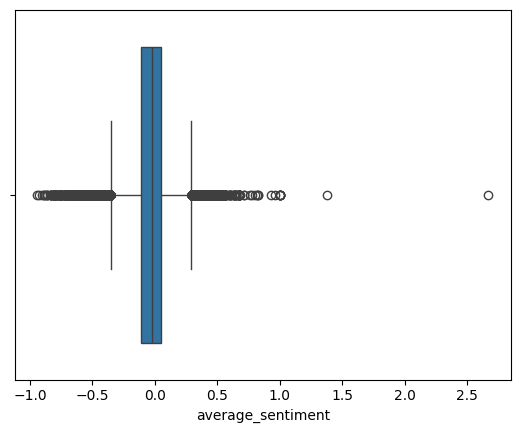

In [ ]:
sns.boxplot(x=sentimentdata['average_sentiment'])

In [ ]:
Q1 = sentimentdata['average_sentiment'].quantile(0.25)
Q3 = sentimentdata['average_sentiment'].quantile(0.75)
IQR = Q3 - Q1
ll=(Q1 - 1.5 * IQR)
ul=(Q3 + 1.5 * IQR)
outliers_count = sentimentdata[(sentimentdata['average_sentiment'] < ll) | (sentimentdata['average_sentiment'] > ul)].shape[0]

print("Number of outliers in column '{}': {}".format('average_sentiment', outliers_count))

Number of outliers in column 'average_sentiment': 2411


In [ ]:
sentimentdata = sentimentdata[(sentimentdata['average_sentiment'] >= ll) & (sentimentdata['average_sentiment'] <= ul)]
sentimentdata.shape

(69182, 6)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='silence_percent_average'>

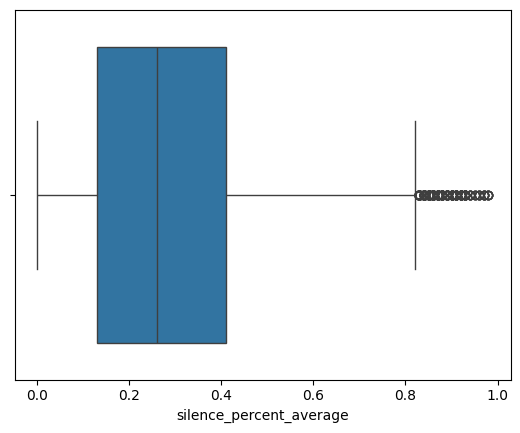

In [ ]:
sns.boxplot(x=sentimentdata['silence_percent_average'])

In [ ]:
Q1 = sentimentdata['silence_percent_average'].quantile(0.25)
Q3 = sentimentdata['silence_percent_average'].quantile(0.75)
IQR = Q3 - Q1
ll=(Q1 - 1.5 * IQR)
ul=(Q3 + 1.5 * IQR)
outliers_count = sentimentdata[(sentimentdata['silence_percent_average'] < ll) | (sentimentdata['silence_percent_average'] > ul)].shape[0]

print("Number of outliers in column '{}': {}".format('silence_percent_average', outliers_count))
sentimentdata = sentimentdata[(sentimentdata['silence_percent_average'] >= ll) & (sentimentdata['silence_percent_average'] <= ul)]
sentimentdata.shape


Number of outliers in column 'silence_percent_average': 361


(68821, 6)

In [ ]:
customerdata['customer_id'].value_counts()

customer_id
2033123310    1
1432598347    1
339140815     1
1406128740    1
9558536170    1
             ..
6283306283    1
9918273673    1
505016057     1
1412516263    1
8014388758    1
Name: count, Length: 46043, dtype: int64

merged reason and sentiment csv file

In [ ]:
merge_dataset = reasonsdata.merge(sentimentdata,on = "call_id")

In [ ]:
merge_dataset

call_id primary_call_reason  agent_id agent_tone customer_tone  \
0      4667960400   Voluntary  Cancel    963118    neutral         angry   
1      1122072124             Booking    519057       calm       neutral   
2      6834291559              IRROPS    158319    neutral        polite   
3      2266439882             Upgrade    488324    neutral    frustrated   
4      1211603231             Seating    721730    neutral        polite   
...           ...                 ...       ...        ...           ...   
63867  7569738090       Mileage  Plus    783441    neutral    frustrated   
63868  1563273072         Post Flight    413148       calm          calm   
63869  8865997781             Upgrade    980156       calm    frustrated   
63870  8019240181             Upgrade    616988       calm        polite   
63871  8210720833    Digital  Support    547592    neutral          calm   

       average_sentiment  silence_percent_average  
0                  -0.04                     0.39  
1                   0.02                     0.35  
2                  -0.13                     0.32  
3                  -0.20                     0.20  
4                  -0.05                     0.35  
...                  ...                      ...  
63867              -0.19                     0.51  
63868               0.05                     0.34  
63869               0.03                     0.22  
63870               0.05                     0.42  
63871               0.00                     0.10  

[63872 rows x 7 columns]

In [ ]:
merge_dataset['primary_call_reason'].value_counts()

primary_call_reason
IRROPS                     12374
Voluntary Change            9975
Seating                     5987
Mileage Plus                5351
Post-Flight                 3698
Communications              3642
Products and Services       2687
Upgrade                     2593
Booking                     2456
Baggage                     2438
Checkout                    1767
Check-In                    1444
Voluntary Cancel            1248
Digital Support              929
ETC                          893
Traveler Updates             732
Schedule Change              671
Other Topics                 531
Products & Services          454
Check In                     374
Disability                   369
Post Flight                  352
Voluntary  Cancel            268
IRROPS                       242
Other  Topics                224
Voluntary Change             203
Voluntary   Change           196
Voluntary  Change            145
Seating                      138
Mileage  Plus                132
Digital   Support            128
Mileage   Plus               125
Baggage                      121
Traveler   Updates           113
Unaccompanied Minor          102
Mileage Plus                  93
Post-Flight                   84
 Baggage                      83
Digital  Support              70
Products and Services         64
Communications                59
Upgrade                       50
Checkout                      46
Booking                       44
Traveler  Updates             35
Check-In                      28
Voluntary Cancel              24
ETC                           22
Schedule Change               19
Digital Support               16
Other Topics                  15
Traveler Updates              10
Disability                     7
Unaccompanied Minor            1
Name: count, dtype: int64

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [ ]:
def group_similar_categories(df, column, threshold=80):
        categories = df[column].unique()
        groups = {}
        for category in categories:
            if category not in groups:
                groups[category] = []
            for other_category in categories:
                if other_category != category and fuzz.ratio(category, other_category) >= threshold:
                    groups[category].append(other_category)
        return groups

similar_categories = group_similar_categories(merge_dataset, 'primary_call_reason')

In [ ]:
for key, values in similar_categories.items():
        for value in values:
            merge_dataset['primary_call_reason'] = merge_dataset['primary_call_reason'].str.replace(value, key)

In [ ]:
merge_dataset['primary_call_reason'].value_counts()

primary_call_reason
IRROPS                     12616
Voluntary  Change          12059
Seating                     6125
Mileage  Plus               5701
Post-Flight                 4134
Communications              3701
Products and Services       3205
Upgrade                     2643
Baggage                     2642
Booking                     2500
Check-In                    1846
Checkout                    1813
Digital  Support            1143
ETC                          893
Traveler   Updates           890
Other Topics                 770
Schedule Change              690
Disability                   376
Unaccompanied Minor          103
ETC                           22
Name: count, dtype: int64

In [ ]:
#reasons_counts = merge_dataset['primary_call_reason'].value_counts()
#reasons_counts_removed = reasons_counts[reasons_counts > 50]

#valid_reasons_counts = reasons_counts_removed.index
#merge_dataset = merge_dataset[merge_dataset['primary_call_reason'].isin(valid_reasons_counts)]

<Axes: xlabel='primary_call_reason'>

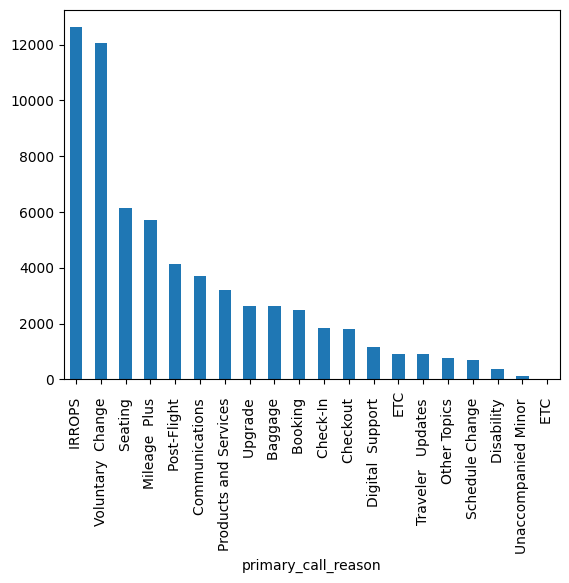

In [ ]:
merge_dataset['primary_call_reason'].value_counts().plot(kind='bar')

<Axes: xlabel='agent_id', ylabel='agent_tone'>

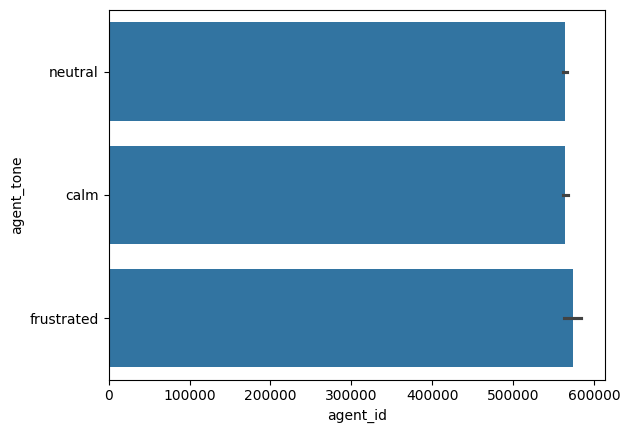

In [ ]:
sns.barplot(x=merge_dataset['agent_id'],y=merge_dataset['agent_tone'])

In [ ]:
calldata = pd.read_csv('callsf0d4f5a.csv', parse_dates=['call_start_datetime', 'call_end_datetime', 'agent_assigned_datetime'])
calldata['waiting_time'] = calldata['agent_assigned_datetime'] - calldata['call_start_datetime']
calldata['resolve_time'] = calldata['call_end_datetime'] - calldata['agent_assigned_datetime']

In [ ]:
calldata['waiting_minutes'] = calldata['waiting_time'].dt.total_seconds() / 60
calldata['resolve_minutes'] = calldata['resolve_time'].dt.total_seconds() / 60

In [ ]:
calldata

call_id  customer_id  agent_id call_start_datetime  \
0      4667960400   2033123310    963118 2024-07-31 23:56:00   
1      1122072124   8186702651    519057 2024-08-01 00:03:00   
2      6834291559   2416856629    158319 2024-07-31 23:59:00   
3      2266439882   1154544516    488324 2024-08-01 00:05:00   
4      1211603231   5214456437    721730 2024-08-01 00:04:00   
...           ...          ...       ...                 ...   
71805  1563273072   8022667294    413148 2024-08-31 23:48:00   
71806  8865997781   4474867021    980156 2024-08-31 23:55:00   
71807  8019240181   9762042472    616988 2024-08-31 23:52:00   
71808  8332067080   8095620266    161354 2024-08-31 23:53:00   
71809  8210720833   8014388758    547592 2024-08-31 23:49:00   

      agent_assigned_datetime   call_end_datetime  \
0         2024-08-01 00:03:00 2024-08-01 00:34:00   
1         2024-08-01 00:06:00 2024-08-01 00:18:00   
2         2024-08-01 00:07:00 2024-08-01 00:26:00   
3         2024-08-01 00:10:00 2024-08-01 00:17:00   
4         2024-08-01 00:14:00 2024-08-01 00:23:00   
...                       ...                 ...   
71805     2024-08-31 23:57:00 2024-09-01 00:25:00   
71806     2024-08-31 23:58:00 2024-09-01 00:06:00   
71807     2024-08-31 23:58:00 2024-09-01 00:04:00   
71808     2024-08-31 23:59:00 2024-09-01 00:03:00   
71809     2024-08-31 23:59:00 2024-09-01 00:02:00   

                                         call_transcript    waiting_time  \
0      \n\nAgent: Thank you for calling United Airlin... 0 days 00:07:00   
1      \n\nAgent: Thank you for calling United Airlin... 0 days 00:03:00   
2      \n\nAgent: Thank you for calling United Airlin... 0 days 00:08:00   
3      \n\nAgent: Thank you for calling United Airlin... 0 days 00:05:00   
4      \n\nAgent: Thank you for calling United Airlin... 0 days 00:10:00   
...                                                  ...             ...   
71805  \n\nAgent: Thank you for calling United Airlin... 0 days 00:09:00   
71806  \n\nAgent: Thank you for calling United Airlin... 0 days 00:03:00   
71807  \n\nAgent: Thank you for calling United Airlin... 0 days 00:06:00   
71808  \n\nAgent: Thank you for calling United Airlin... 0 days 00:06:00   
71809  \n\nAgent: Thank you for calling United Airlin... 0 days 00:10:00   

         resolve_time  waiting_minutes  resolve_minutes  
0     0 days 00:31:00              7.0             31.0  
1     0 days 00:12:00              3.0             12.0  
2     0 days 00:19:00              8.0             19.0  
3     0 days 00:07:00              5.0              7.0  
4     0 days 00:09:00             10.0              9.0  
...               ...              ...              ...  
71805 0 days 00:28:00              9.0             28.0  
71806 0 days 00:08:00              3.0              8.0  
71807 0 days 00:06:00              6.0              6.0  
71808 0 days 00:04:00              6.0              4.0  
71809 0 days 00:03:00             10.0              3.0  

[71810 rows x 11 columns]

merging dataset calldata and mergedataset

In [ ]:
merge_dataset_2 = merge_dataset.merge(calldata,on = "call_id")
merge_dataset_2

call_id  primary_call_reason  agent_id_x agent_tone customer_tone  \
0      4667960400  Voluntary  Change        963118    neutral         angry   
1      1122072124            Booking        519057       calm       neutral   
2      6834291559             IRROPS        158319    neutral        polite   
3      2266439882            Upgrade        488324    neutral    frustrated   
4      1211603231            Seating        721730    neutral        polite   
...           ...                  ...         ...        ...           ...   
63867  7569738090      Mileage  Plus        783441    neutral    frustrated   
63868  1563273072        Post-Flight        413148       calm          calm   
63869  8865997781            Upgrade        980156       calm    frustrated   
63870  8019240181            Upgrade        616988       calm        polite   
63871  8210720833   Digital  Support        547592    neutral          calm   

       average_sentiment  silence_percent_average  customer_id  agent_id_y  \
0                  -0.04                     0.39   2033123310      963118   
1                   0.02                     0.35   8186702651      519057   
2                  -0.13                     0.32   2416856629      158319   
3                  -0.20                     0.20   1154544516      488324   
4                  -0.05                     0.35   5214456437      721730   
...                  ...                      ...          ...         ...   
63867              -0.19                     0.51   7367304988      783441   
63868               0.05                     0.34   8022667294      413148   
63869               0.03                     0.22   4474867021      980156   
63870               0.05                     0.42   9762042472      616988   
63871               0.00                     0.10   8014388758      547592   

      call_start_datetime agent_assigned_datetime   call_end_datetime  \
0     2024-07-31 23:56:00     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:03:00     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-07-31 23:59:00     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:05:00     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:04:00     2024-08-01 00:14:00 2024-08-01 00:23:00   
...                   ...                     ...                 ...   
63867 2024-08-31 23:51:00     2024-08-31 23:57:00 2024-09-01 00:07:00   
63868 2024-08-31 23:48:00     2024-08-31 23:57:00 2024-09-01 00:25:00   
63869 2024-08-31 23:55:00     2024-08-31 23:58:00 2024-09-01 00:06:00   
63870 2024-08-31 23:52:00     2024-08-31 23:58:00 2024-09-01 00:04:00   
63871 2024-08-31 23:49:00     2024-08-31 23:59:00 2024-09-01 00:02:00   

                                         call_transcript    waiting_time  \
0      \n\nAgent: Thank you for calling United Airlin... 0 days 00:07:00   
1      \n\nAgent: Thank you for calling United Airlin... 0 days 00:03:00   
2      \n\nAgent: Thank you for calling United Airlin... 0 days 00:08:00   
3      \n\nAgent: Thank you for calling United Airlin... 0 days 00:05:00   
4      \n\nAgent: Thank you for calling United Airlin... 0 days 00:10:00   
...                                                  ...             ...   
63867  \n\nAgent: Thank you for calling United Airlin... 0 days 00:06:00   
63868  \n\nAgent: Thank you for calling United Airlin... 0 days 00:09:00   
63869  \n\nAgent: Thank you for calling United Airlin... 0 days 00:03:00   
63870  \n\nAgent: Thank you for calling United Airlin... 0 days 00:06:00   
63871  \n\nAgent: Thank you for calling United Airlin... 0 days 00:10:00   

         resolve_time  waiting_minutes  resolve_minutes  
0     0 days 00:31:00              7.0             31.0  
1     0 days 00:12:00              3.0             12.0  
2     0 days 00:19:00              8.0             19.0  
3     0 days 00:07:00              5.0              7.0  
4     0 days 00:09:00             10.0      

CREATING FINAL MERGE DATASET WITH MERGING CUSTOMER DATA

In [ ]:
final_total_merge_dataset = merge_dataset_2.merge(customerdata,on = "customer_id")

In [ ]:
final_total_merge_dataset

call_id  primary_call_reason  agent_id_x agent_tone customer_tone  \
0      4667960400  Voluntary  Change        963118    neutral         angry   
1      2266439882            Upgrade        488324    neutral    frustrated   
2      1211603231            Seating        721730    neutral        polite   
3      5297766997      Mileage  Plus        817160       calm          calm   
4      8902603117      Mileage  Plus        488324       calm         angry   
...           ...                  ...         ...        ...           ...   
40936  8351489985            Upgrade        859203    neutral        polite   
40937  9581271057  Voluntary  Change        335773    neutral         angry   
40938  7569738090      Mileage  Plus        783441    neutral    frustrated   
40939  8865997781            Upgrade        980156       calm    frustrated   
40940  8210720833   Digital  Support        547592    neutral          calm   

       average_sentiment  silence_percent_average  customer_id  agent_id_y  \
0                  -0.04                     0.39   2033123310      963118   
1                  -0.20                     0.20   1154544516      488324   
2                  -0.05                     0.35   5214456437      721730   
3                   0.10                     0.11   5590154991      817160   
4                   0.11                     0.35   7974326984      488324   
...                  ...                      ...          ...         ...   
40936              -0.07                     0.04   5821883708      859203   
40937              -0.25                     0.03   6137149578      335773   
40938              -0.19                     0.51   7367304988      783441   
40939               0.03                     0.22   4474867021      980156   
40940               0.00                     0.10   8014388758      547592   

      call_start_datetime agent_assigned_datetime   call_end_datetime  \
0     2024-07-31 23:56:00     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:05:00     2024-08-01 00:10:00 2024-08-01 00:17:00   
2     2024-08-01 00:04:00     2024-08-01 00:14:00 2024-08-01 00:23:00   
3     2024-08-01 00:11:00     2024-08-01 00:16:00 2024-08-01 00:40:00   
4     2024-08-01 00:13:00     2024-08-01 00:21:00 2024-08-01 00:29:00   
...                   ...                     ...                 ...   
40936 2024-08-31 23:48:00     2024-08-31 23:55:00 2024-09-01 00:10:00   
40937 2024-08-31 23:46:00     2024-08-31 23:56:00 2024-08-31 23:59:00   
40938 2024-08-31 23:51:00     2024-08-31 23:57:00 2024-09-01 00:07:00   
40939 2024-08-31 23:55:00     2024-08-31 23:58:00 2024-09-01 00:06:00   
40940 2024-08-31 23:49:00     2024-08-31 23:59:00 2024-09-01 00:02:00   

                                         call_transcript    waiting_time  \
0      \n\nAgent: Thank you for calling United Airlin... 0 days 00:07:00   
1      \n\nAgent: Thank you for calling United Airlin... 0 days 00:05:00   
2      \n\nAgent: Thank you for calling United Airlin... 0 days 00:10:00   
3      \n\nAgent: Thank you for calling United Airlin... 0 days 00:05:00   
4      \n\nAgent: Thank you for calling United Airlin... 0 days 00:08:00   
...                                                  ...             ...   
40936  \n\nAgent: Thank you for calling United Airlin... 0 days 00:07:00   
40937  \n\nAgent: Thank you for calling United Airlin... 0 days 00:10:00   
40938  \n\nAgent: Thank you for calling United Airlin... 0 days 00:06:00   
40939  \n\nAgent: Thank you for calling United Airlin... 0 days 00:03:00   
40940  \n\nAgent: Thank you for calling United Airlin... 0 days 00:10:00   

         resolve_time  waiting_minutes  resolve_minutes      customer_name  \
0     0 days 00:31:00              7.0             31.0     Matthew Foster   
1     0 days 00:07:00              5.0              7.0      David Wilkins   
2     0 days 00:09:00             10.0              9.0  Elizabeth Daniels   
3     0 days 00:24:00 

In [ ]:
final_total_merge_dataset = final_total_merge_dataset.drop(['agent_id_y', 'customer_name'], axis=1)

In [ ]:
customer_stats = calldata.groupby('customer_id').agg({'waiting_time': 'sum', 'call_start_datetime': 'count'})
customer_stats = customer_stats.rename(columns={'waiting_time': 'total_waiting_time', 'call_start_datetime': 'number_of_calls'})
customer_stats['ast'] = customer_stats['total_waiting_time'].dt.total_seconds() / customer_stats['number_of_calls']
customer_stats

total_waiting_time  number_of_calls    ast
customer_id                                           
11978          0 days 00:04:00                1  240.0
443070         0 days 00:09:00                1  540.0
474941         0 days 00:07:00                1  420.0
476994         0 days 00:09:00                1  540.0
752705         0 days 00:09:00                1  540.0
...                        ...              ...    ...
9999462506     0 days 00:07:00                1  420.0
9999606019     0 days 00:03:00                1  180.0
9999669080     0 days 00:06:00                1  360.0
9999900870     0 days 00:03:00                1  180.0
9999935113     0 days 00:04:00                1  240.0

[71810 rows x 3 columns]

In [ ]:
final_total_merge_dataset = final_total_merge_dataset.join(customer_stats['ast'], on='customer_id')

In [ ]:
final_total_merge_dataset

call_id  primary_call_reason  agent_id_x agent_tone customer_tone  \
0      4667960400  Voluntary  Change        963118    neutral         angry   
1      2266439882            Upgrade        488324    neutral    frustrated   
2      1211603231            Seating        721730    neutral        polite   
3      5297766997      Mileage  Plus        817160       calm          calm   
4      8902603117      Mileage  Plus        488324       calm         angry   
...           ...                  ...         ...        ...           ...   
40936  8351489985            Upgrade        859203    neutral        polite   
40937  9581271057  Voluntary  Change        335773    neutral         angry   
40938  7569738090      Mileage  Plus        783441    neutral    frustrated   
40939  8865997781            Upgrade        980156       calm    frustrated   
40940  8210720833   Digital  Support        547592    neutral          calm   

       average_sentiment  silence_percent_average  customer_id  \
0                  -0.04                     0.39   2033123310   
1                  -0.20                     0.20   1154544516   
2                  -0.05                     0.35   5214456437   
3                   0.10                     0.11   5590154991   
4                   0.11                     0.35   7974326984   
...                  ...                      ...          ...   
40936              -0.07                     0.04   5821883708   
40937              -0.25                     0.03   6137149578   
40938              -0.19                     0.51   7367304988   
40939               0.03                     0.22   4474867021   
40940               0.00                     0.10   8014388758   

      call_start_datetime agent_assigned_datetime   call_end_datetime  \
0     2024-07-31 23:56:00     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:05:00     2024-08-01 00:10:00 2024-08-01 00:17:00   
2     2024-08-01 00:04:00     2024-08-01 00:14:00 2024-08-01 00:23:00   
3     2024-08-01 00:11:00     2024-08-01 00:16:00 2024-08-01 00:40:00   
4     2024-08-01 00:13:00     2024-08-01 00:21:00 2024-08-01 00:29:00   
...                   ...                     ...                 ...   
40936 2024-08-31 23:48:00     2024-08-31 23:55:00 2024-09-01 00:10:00   
40937 2024-08-31 23:46:00     2024-08-31 23:56:00 2024-08-31 23:59:00   
40938 2024-08-31 23:51:00     2024-08-31 23:57:00 2024-09-01 00:07:00   
40939 2024-08-31 23:55:00     2024-08-31 23:58:00 2024-09-01 00:06:00   
40940 2024-08-31 23:49:00     2024-08-31 23:59:00 2024-09-01 00:02:00   

                                         call_transcript    waiting_time  \
0      \n\nAgent: Thank you for calling United Airlin... 0 days 00:07:00   
1      \n\nAgent: Thank you for calling United Airlin... 0 days 00:05:00   
2      \n\nAgent: Thank you for calling United Airlin... 0 days 00:10:00   
3      \n\nAgent: Thank you for calling United Airlin... 0 days 00:05:00   
4      \n\nAgent: Thank you for calling United Airlin... 0 days 00:08:00   
...                                                  ...             ...   
40936  \n\nAgent: Thank you for calling United Airlin... 0 days 00:07:00   
40937  \n\nAgent: Thank you for calling United Airlin... 0 days 00:10:00   
40938  \n\nAgent: Thank you for calling United Airlin... 0 days 00:06:00   
40939  \n\nAgent: Thank you for calling United Airlin... 0 days 00:03:00   
40940  \n\nAgent: Thank you for calling United Airlin... 0 days 00:10:00   

         resolve_time  waiting_minutes  resolve_minutes  elite_level_code  \
0     0 days 00:31:00              7.0             31.0               4.0   
1     0 days 00:07:00              5.0              7.0               2.0   
2     0 days 00:09:00             10.0              9.0               0.0   
3     0 days 00:24:00              5.0             24.0               5.0   
4     0 days 00:08:00              8.0              8.0               2.0   
...             

In [ ]:
customer_stats = calldata.groupby('customer_id').agg({'resolve_time': 'sum', 'call_start_datetime': 'count'})
customer_stats = customer_stats.rename(columns={'resolve_time': 'total_resolve_time', 'call_start_datetime': 'number_of_calls'})
customer_stats['aht'] = customer_stats['total_resolve_time'].dt.total_seconds() / customer_stats['number_of_calls']
customer_stats

total_resolve_time  number_of_calls    aht
customer_id                                           
11978          0 days 00:01:00                1   60.0
443070         0 days 00:05:00                1  300.0
474941         0 days 00:07:00                1  420.0
476994         0 days 00:05:00                1  300.0
752705         0 days 00:04:00                1  240.0
...                        ...              ...    ...
9999462506     0 days 00:03:00                1  180.0
9999606019     0 days 00:02:00                1  120.0
9999669080     0 days 00:02:00                1  120.0
9999900870     0 days 00:01:00                1   60.0
9999935113     0 days 00:11:00                1  660.0

[71810 rows x 3 columns]

In [ ]:
final_total_merge_dataset = final_total_merge_dataset.join(customer_stats['aht'], on='customer_id')

In [ ]:
final_total_merge_dataset

call_id  primary_call_reason  agent_id_x agent_tone customer_tone  \
0      4667960400  Voluntary  Change        963118    neutral         angry   
1      2266439882            Upgrade        488324    neutral    frustrated   
2      1211603231            Seating        721730    neutral        polite   
3      5297766997      Mileage  Plus        817160       calm          calm   
4      8902603117      Mileage  Plus        488324       calm         angry   
...           ...                  ...         ...        ...           ...   
40936  8351489985            Upgrade        859203    neutral        polite   
40937  9581271057  Voluntary  Change        335773    neutral         angry   
40938  7569738090      Mileage  Plus        783441    neutral    frustrated   
40939  8865997781            Upgrade        980156       calm    frustrated   
40940  8210720833   Digital  Support        547592    neutral          calm   

       average_sentiment  silence_percent_average  customer_id  \
0                  -0.04                     0.39   2033123310   
1                  -0.20                     0.20   1154544516   
2                  -0.05                     0.35   5214456437   
3                   0.10                     0.11   5590154991   
4                   0.11                     0.35   7974326984   
...                  ...                      ...          ...   
40936              -0.07                     0.04   5821883708   
40937              -0.25                     0.03   6137149578   
40938              -0.19                     0.51   7367304988   
40939               0.03                     0.22   4474867021   
40940               0.00                     0.10   8014388758   

      call_start_datetime agent_assigned_datetime   call_end_datetime  \
0     2024-07-31 23:56:00     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:05:00     2024-08-01 00:10:00 2024-08-01 00:17:00   
2     2024-08-01 00:04:00     2024-08-01 00:14:00 2024-08-01 00:23:00   
3     2024-08-01 00:11:00     2024-08-01 00:16:00 2024-08-01 00:40:00   
4     2024-08-01 00:13:00     2024-08-01 00:21:00 2024-08-01 00:29:00   
...                   ...                     ...                 ...   
40936 2024-08-31 23:48:00     2024-08-31 23:55:00 2024-09-01 00:10:00   
40937 2024-08-31 23:46:00     2024-08-31 23:56:00 2024-08-31 23:59:00   
40938 2024-08-31 23:51:00     2024-08-31 23:57:00 2024-09-01 00:07:00   
40939 2024-08-31 23:55:00     2024-08-31 23:58:00 2024-09-01 00:06:00   
40940 2024-08-31 23:49:00     2024-08-31 23:59:00 2024-09-01 00:02:00   

                                         call_transcript    waiting_time  \
0      \n\nAgent: Thank you for calling United Airlin... 0 days 00:07:00   
1      \n\nAgent: Thank you for calling United Airlin... 0 days 00:05:00   
2      \n\nAgent: Thank you for calling United Airlin... 0 days 00:10:00   
3      \n\nAgent: Thank you for calling United Airlin... 0 days 00:05:00   
4      \n\nAgent: Thank you for calling United Airlin... 0 days 00:08:00   
...                                                  ...             ...   
40936  \n\nAgent: Thank you for calling United Airlin... 0 days 00:07:00   
40937  \n\nAgent: Thank you for calling United Airlin... 0 days 00:10:00   
40938  \n\nAgent: Thank you for calling United Airlin... 0 days 00:06:00   
40939  \n\nAgent: Thank you for calling United Airlin... 0 days 00:03:00   
40940  \n\nAgent: Thank you for calling United Airlin... 0 days 00:10:00   

         resolve_time  waiting_minutes  resolve_minutes  elite_level_code  \
0     0 days 00:31:00              7.0             31.0               4.0   
1     0 days 00:07:00              5.0              7.0               2.0   
2     0 days 00:09:00             10.0              9.0               0.0   
3     0 days 00:24:00              5.0             24.0               5.0   
4     0 days 00:08:00              8.0              8.0               2.0   
...             

In [ ]:
final_total_merge_dataset = final_total_merge_dataset.drop(columns=[ 'call_start_datetime','agent_assigned_datetime','call_end_datetime','waiting_time','resolve_time'], axis=1)


**DATA VISUALIZATION**

GRAPH OF AST VS PRIMARY CALL REASONS

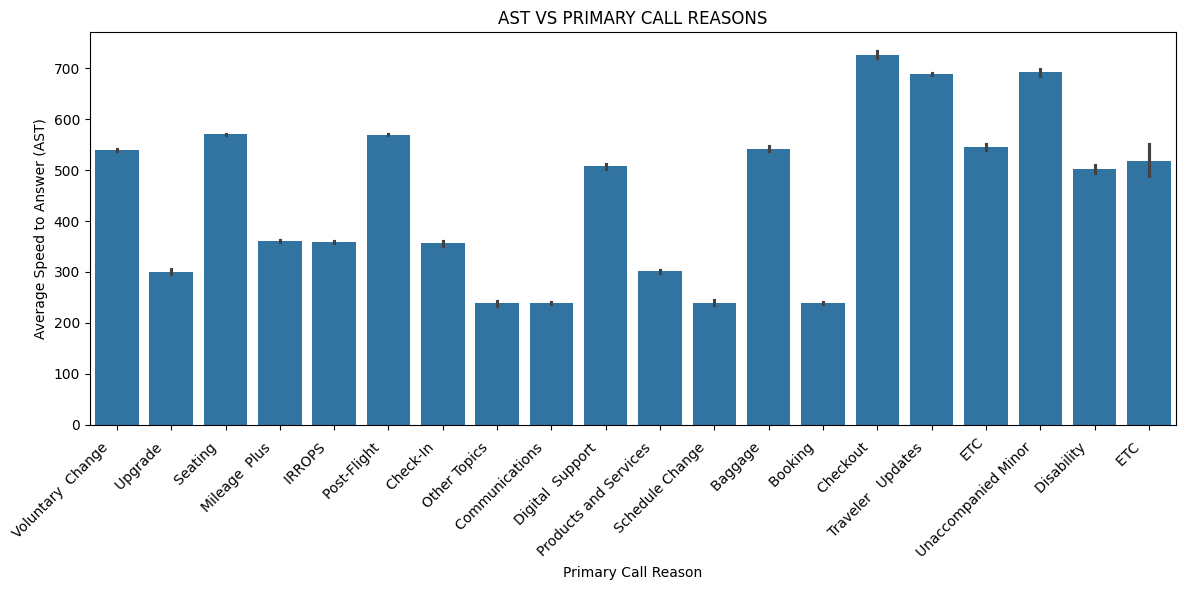

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_call_reason', y='ast', data=final_total_merge_dataset)
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Speed to Answer (AST)')
plt.title('AST VS PRIMARY CALL REASONS')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

GRAPH OF AST VS ELITE LEVEL CODE

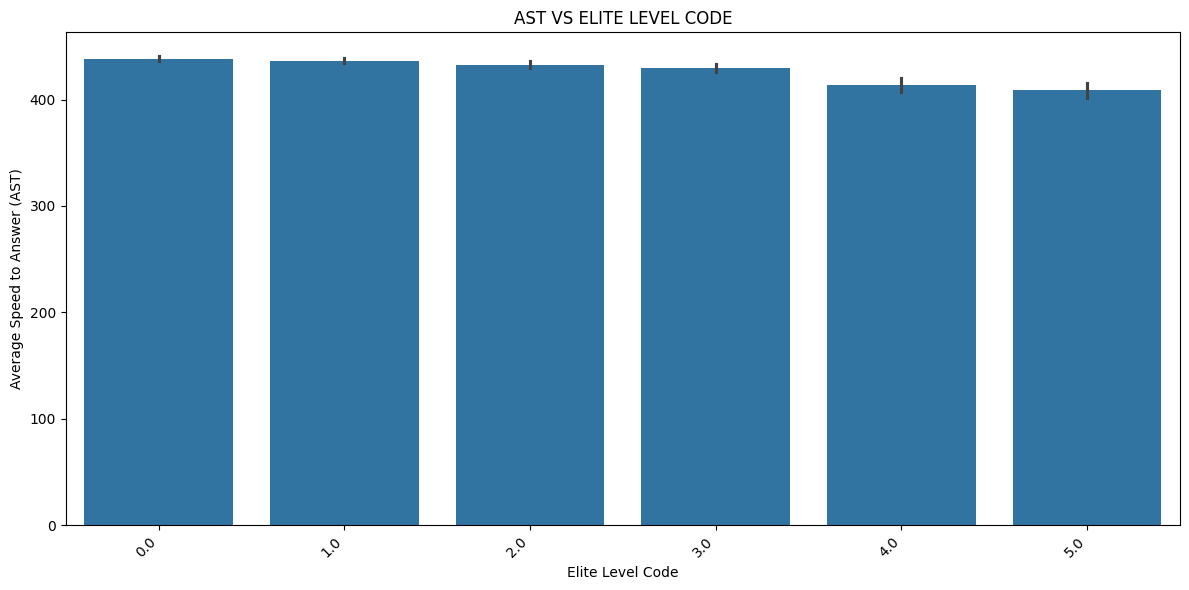

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='elite_level_code', y='ast', data=final_total_merge_dataset)
plt.xlabel('Elite Level Code')
plt.ylabel('Average Speed to Answer (AST)')
plt.title('AST VS ELITE LEVEL CODE')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


AHT VS PRIMARY CALL REASONS

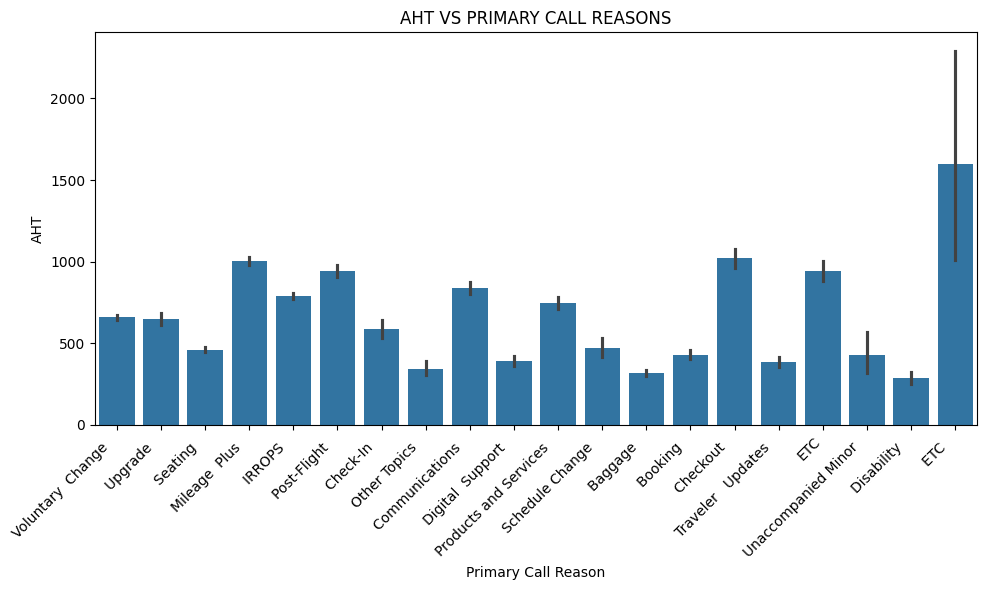

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='primary_call_reason', y='aht', data=final_total_merge_dataset)
plt.xlabel('Primary Call Reason')
plt.ylabel('AHT')
plt.title('AHT VS PRIMARY CALL REASONS')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


AHT VS AGENT TONE

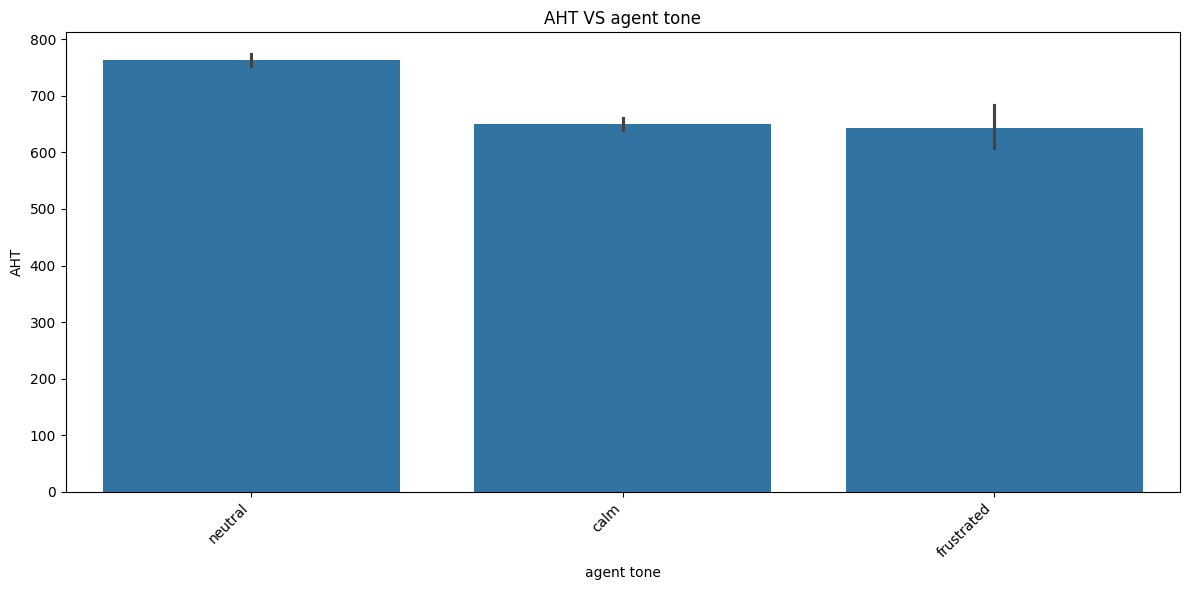

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='agent_tone', y='aht', data=final_total_merge_dataset)
plt.xlabel('agent tone')
plt.ylabel('AHT')
plt.title('AHT VS agent tone')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

AHT VS CUSTOMER TONE :

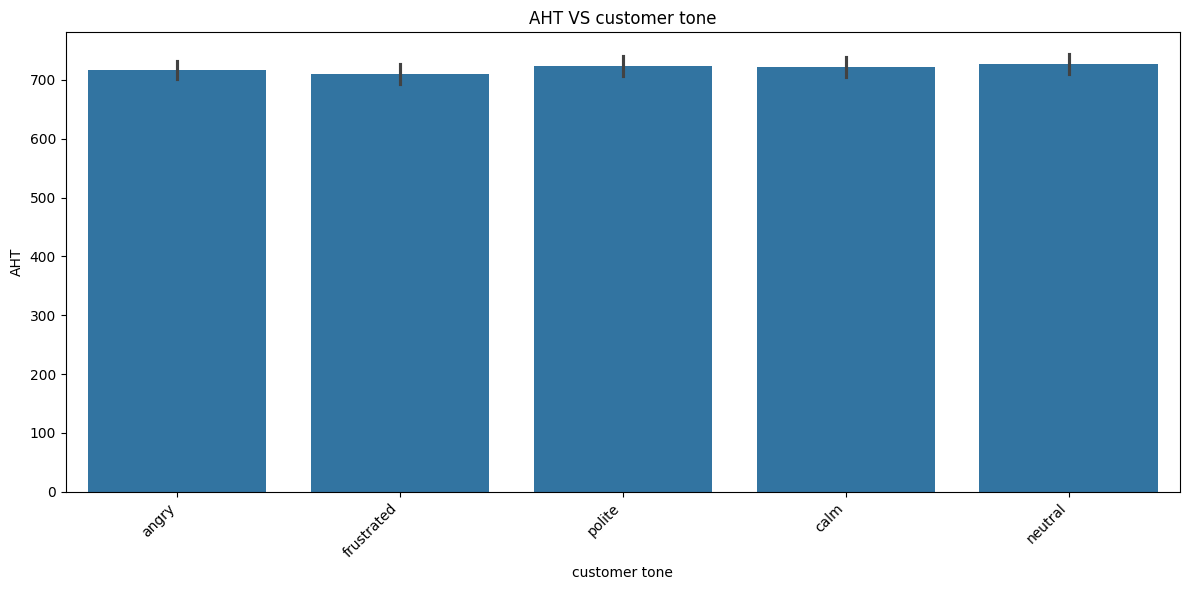

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_tone', y='aht', data=final_total_merge_dataset)
plt.xlabel('customer tone')
plt.ylabel('AHT')
plt.title('AHT VS customer tone')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

AHT VS SILENT PERCENTAGE :


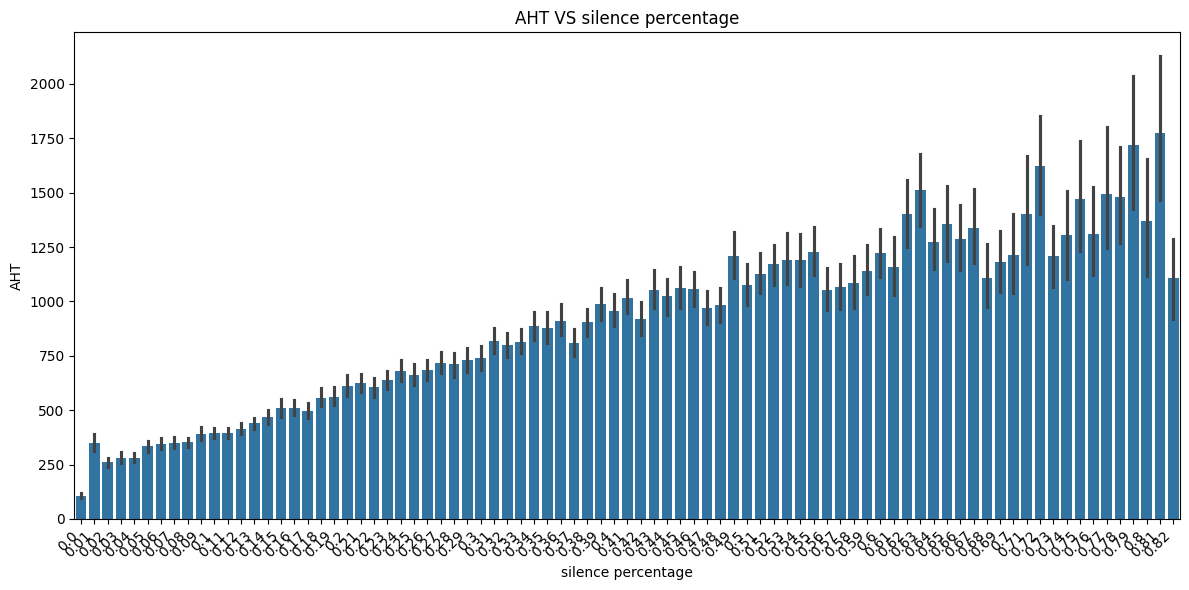

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='silence_percent_average', y='aht', data=final_total_merge_dataset)
plt.xlabel('silence percentage')
plt.ylabel('AHT')
plt.title('AHT VS silence percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

reason vs silence percentage

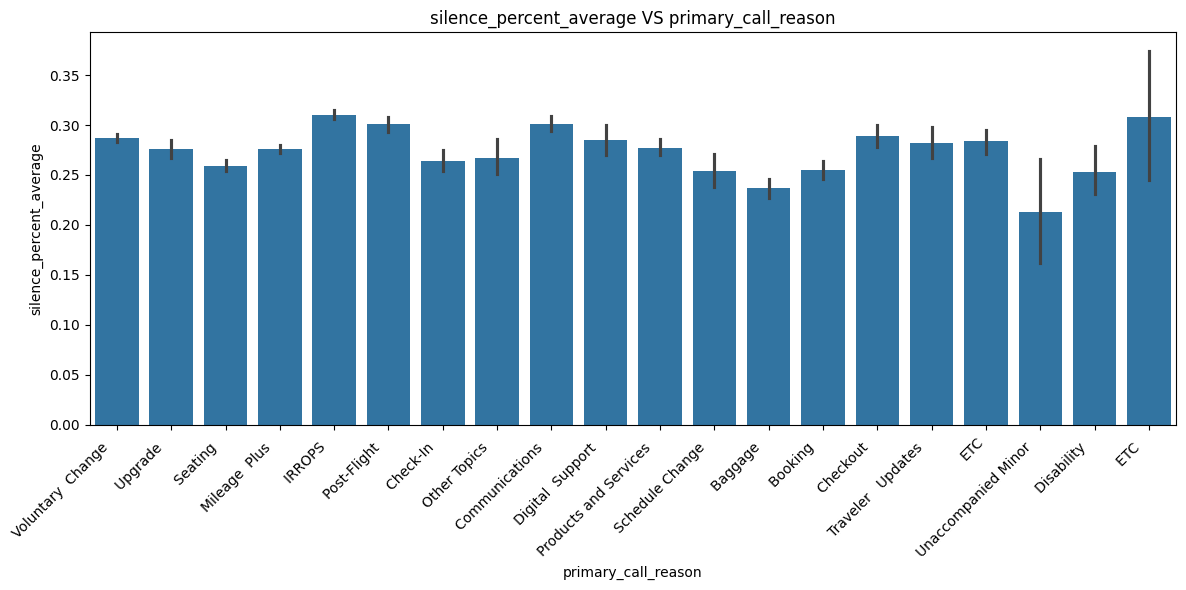

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_call_reason', y='silence_percent_average', data=final_total_merge_dataset)
plt.xlabel('primary_call_reason')
plt.ylabel('silence_percent_average')
plt.title('silence_percent_average VS primary_call_reason')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

AHT VS ELITE LEVEL CODE

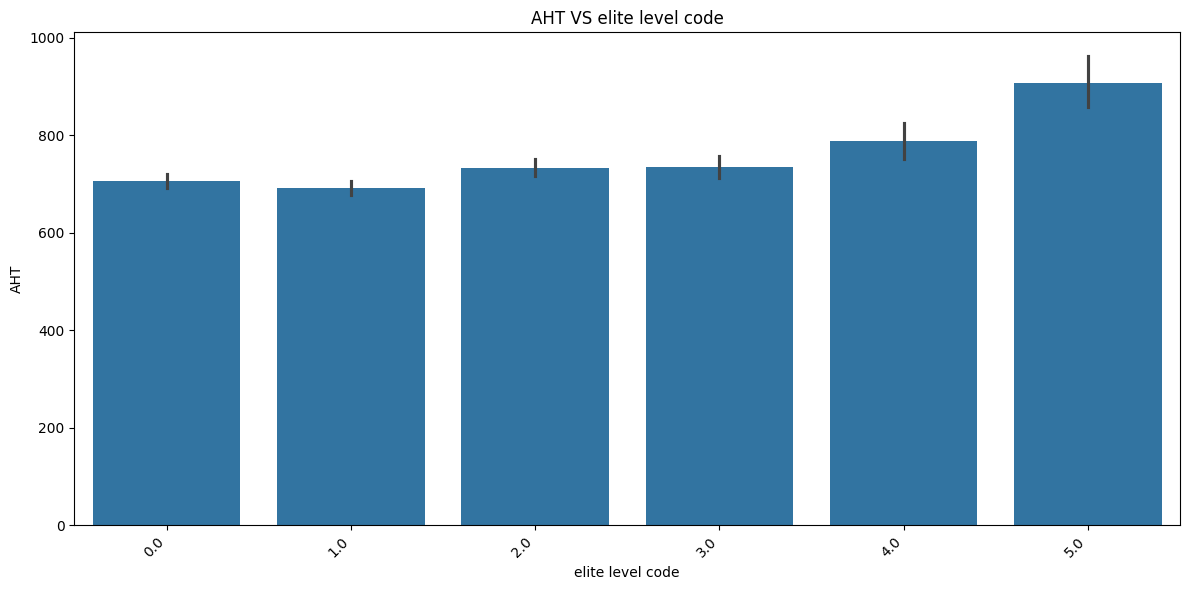

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='elite_level_code', y='aht', data=final_total_merge_dataset)
plt.xlabel('elite level code')
plt.ylabel('AHT')
plt.title('AHT VS elite level code')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


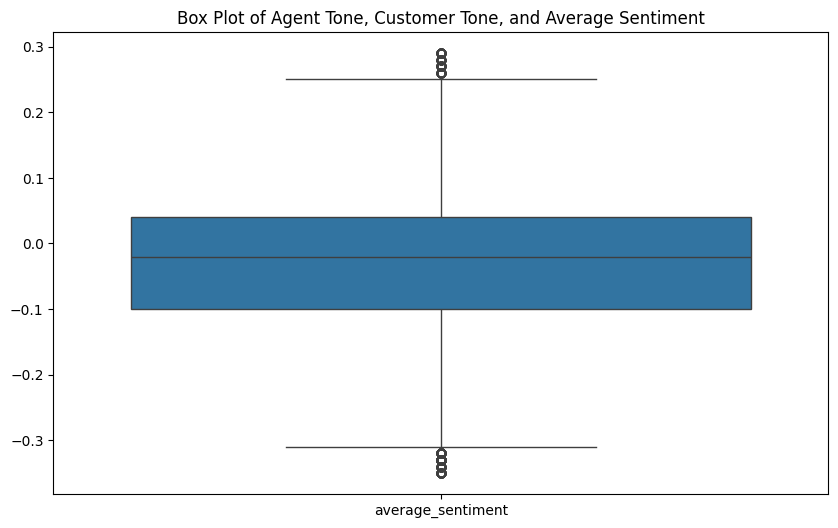

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_total_merge_dataset[['agent_tone', 'customer_tone', 'average_sentiment']])
plt.title('Box Plot of Agent Tone, Customer Tone, and Average Sentiment')
plt.show()

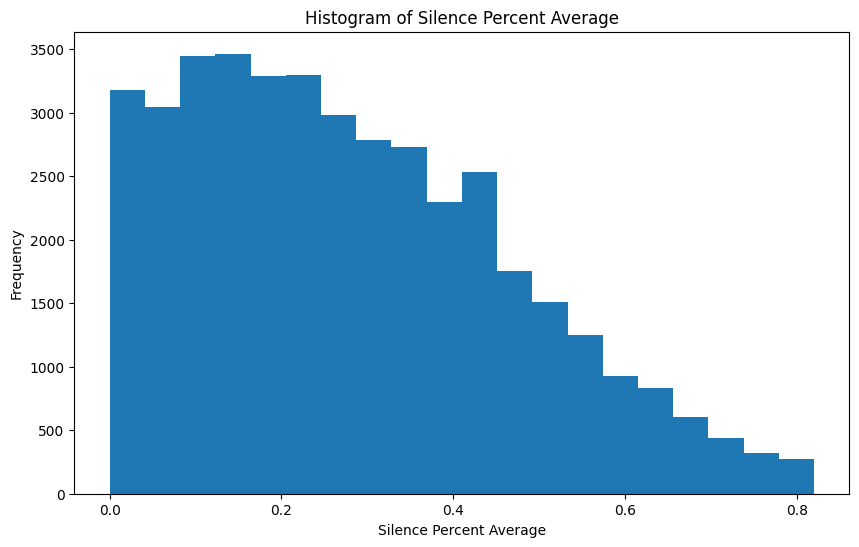

In [ ]:
plt.figure(figsize=(10, 6))
final_total_merge_dataset['silence_percent_average'].plot(kind='hist', bins=20, title='Histogram of Silence Percent Average')
plt.xlabel('Silence Percent Average')
plt.show()

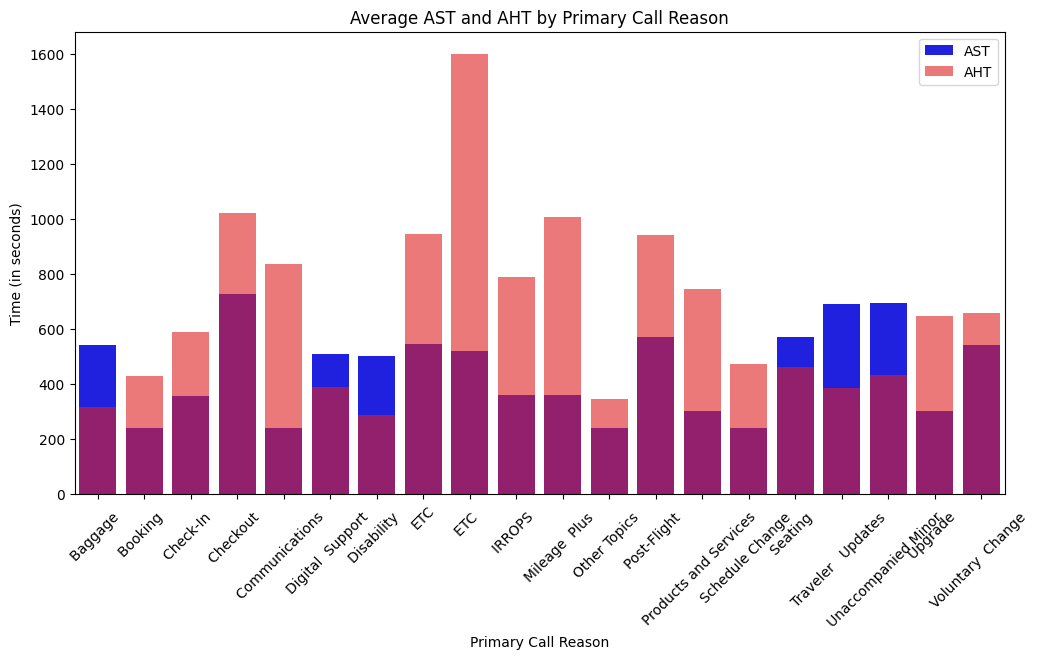

In [ ]:
grouped_data = final_total_merge_dataset.groupby('primary_call_reason').agg({'ast': 'mean', 'aht': 'mean'}).reset_index()

# Bar plot for AST and AHT by primary_call_reason
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_call_reason', y='ast', data=grouped_data, color='blue', label='AST')
sns.barplot(x='primary_call_reason', y='aht', data=grouped_data, color='red', label='AHT', alpha=0.6)
plt.title('Average AST and AHT by Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Time (in seconds)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

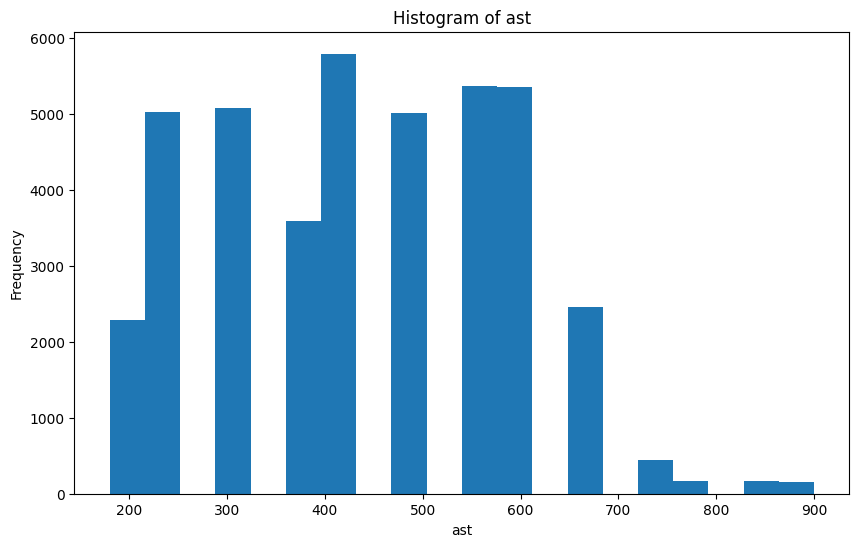

In [ ]:
plt.figure(figsize=(10, 6))
final_total_merge_dataset['ast'].plot(kind='hist', bins=20, title='Histogram of ast')
plt.xlabel('ast')
plt.show()

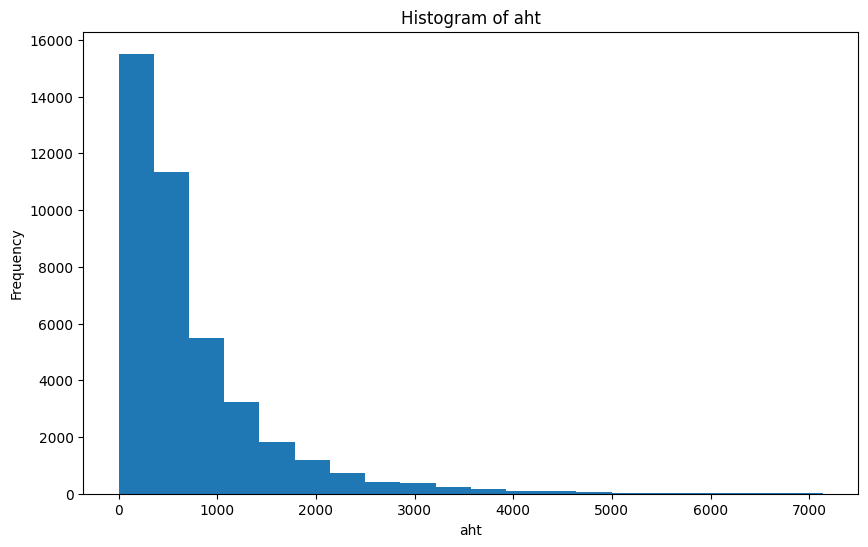

In [ ]:
plt.figure(figsize=(10, 6))
final_total_merge_dataset['aht'].plot(kind='hist', bins=20, title='Histogram of aht')
plt.xlabel('aht')
plt.show()

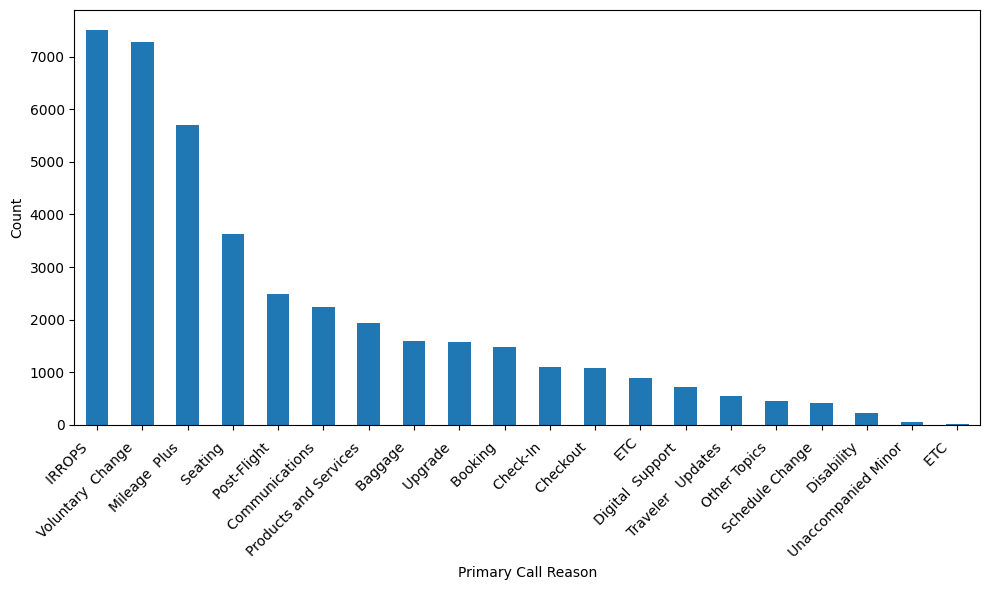

In [ ]:
plt.figure(figsize=(10, 6))
final_total_merge_dataset['primary_call_reason'].value_counts().plot(kind='bar')
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
reason_aht_counts = final_total_merge_dataset.groupby('primary_call_reason')['aht'].mean()
most_frequent_reason = reason_aht_counts.idxmax()
least_frequent_reason = reason_aht_counts.idxmin()

most_frequent_aht = reason_aht_counts[most_frequent_reason]
least_frequent_aht = reason_aht_counts[least_frequent_reason]

percentage_difference = ((most_frequent_aht - least_frequent_aht) / least_frequent_aht) * 100
print(f"Percentage difference between most frequent and least frequent reason for AHT: {percentage_difference:.2f}%")


Percentage difference between most frequent and least frequent reason for AHT: 461.20%


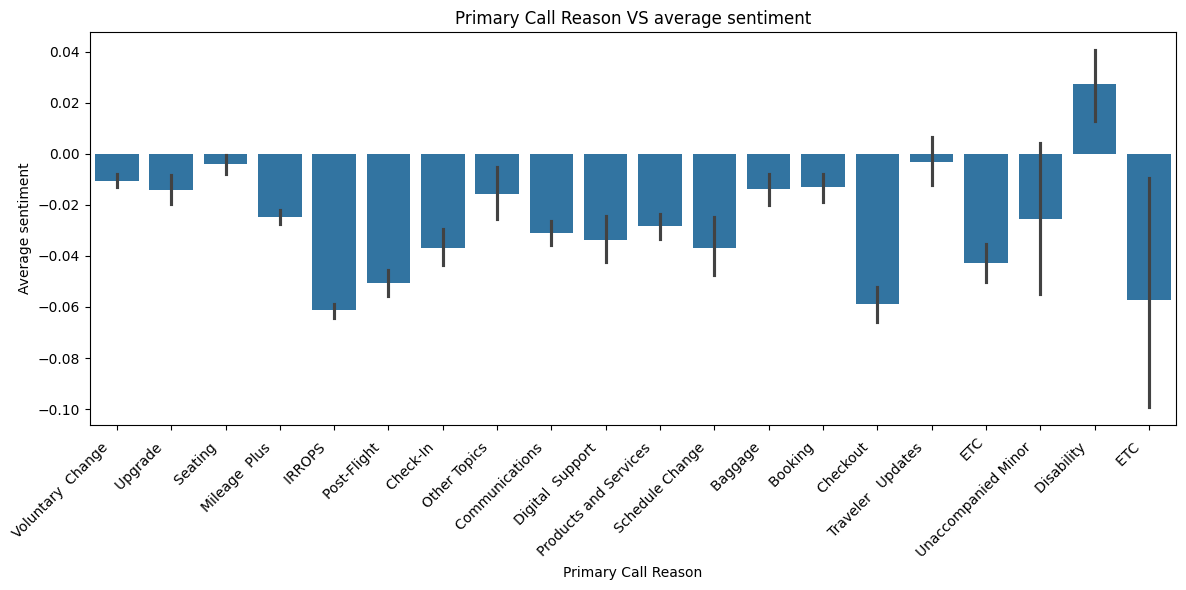

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_call_reason', y='average_sentiment', data=final_total_merge_dataset)
plt.xlabel('Primary Call Reason')
plt.ylabel('Average sentiment')
plt.title('Primary Call Reason VS average sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

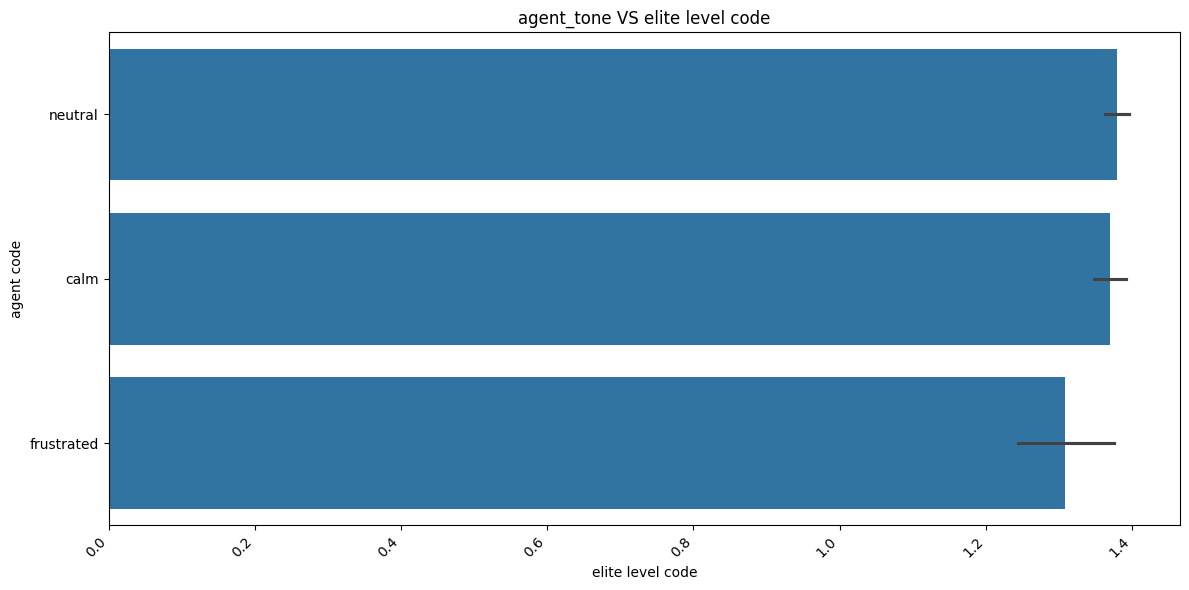

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='elite_level_code', y='agent_tone', data=final_total_merge_dataset)
plt.xlabel('elite level code')
plt.ylabel('agent code')
plt.title('agent_tone VS elite level code')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

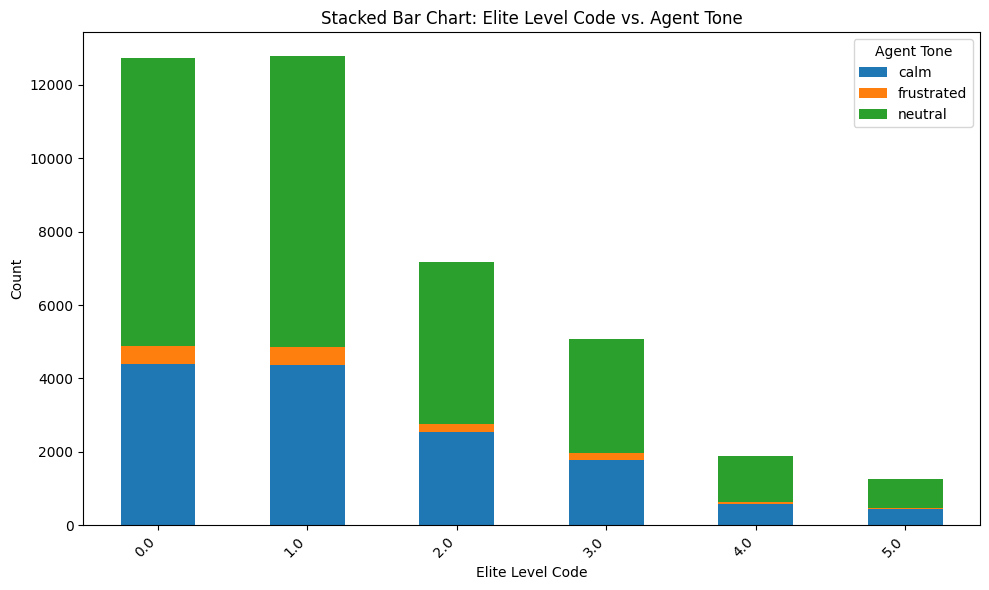

In [ ]:
elite_agent_counts = final_total_merge_dataset.groupby(['elite_level_code', 'agent_tone'])['call_id'].count().unstack()
elite_agent_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Elite Level Code')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Elite Level Code vs. Agent Tone')
plt.legend(title='Agent Tone')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


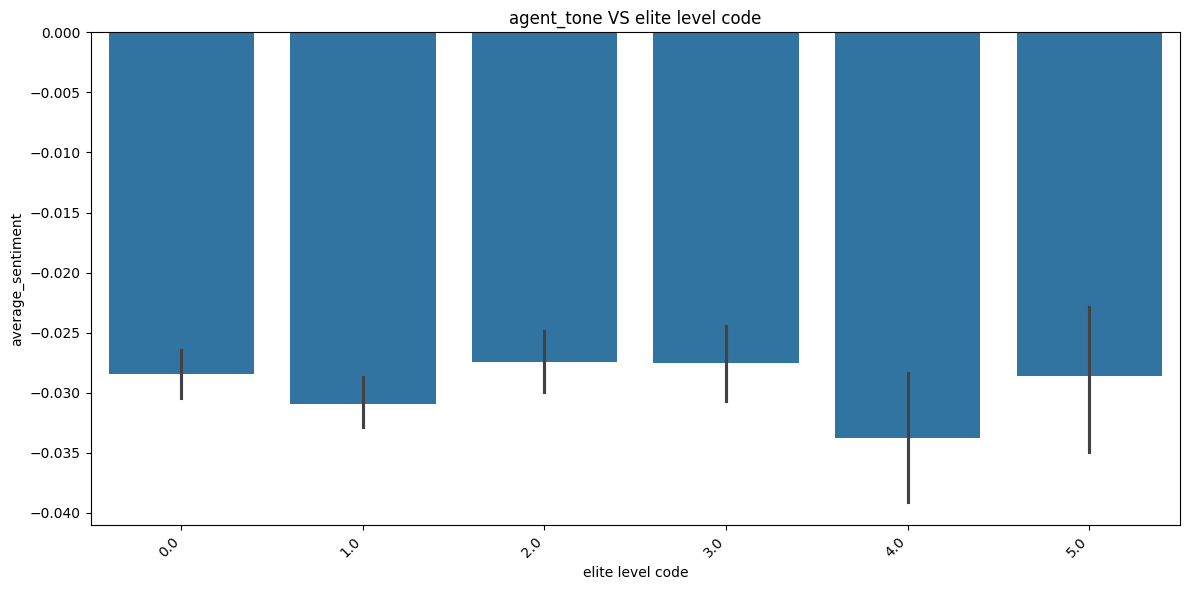

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='elite_level_code', y='average_sentiment', data=final_total_merge_dataset)
plt.xlabel('elite level code')
plt.ylabel('average_sentiment')
plt.title('agent_tone VS elite level code')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

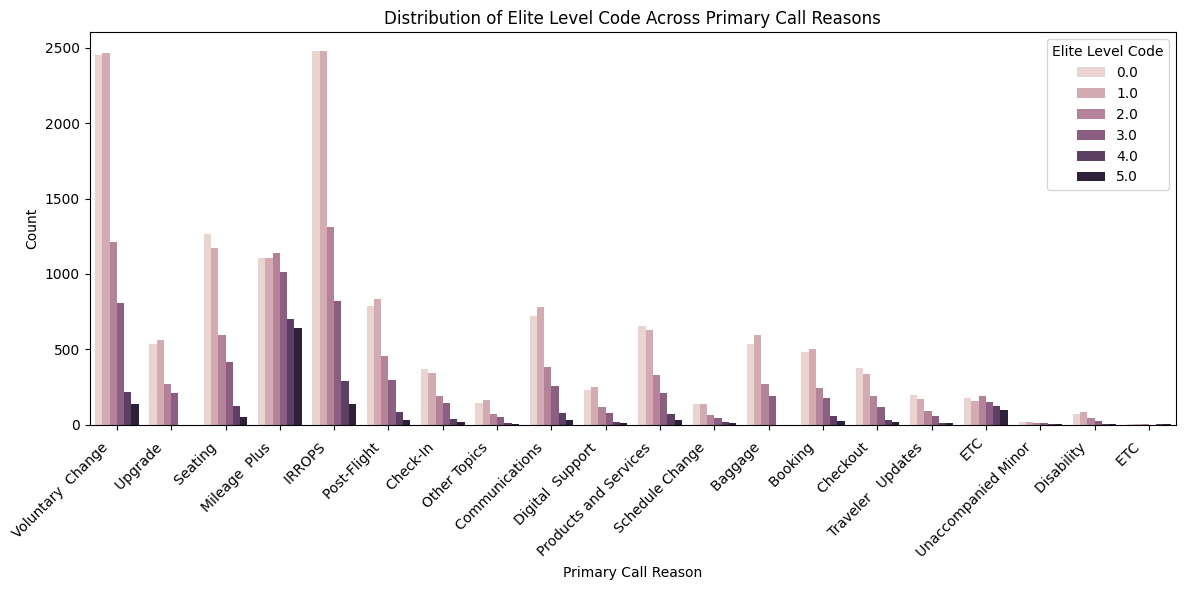

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='primary_call_reason', hue='elite_level_code', data=final_total_merge_dataset)
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.title('Distribution of Elite Level Code Across Primary Call Reasons')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Elite Level Code')
plt.tight_layout()
plt.show()


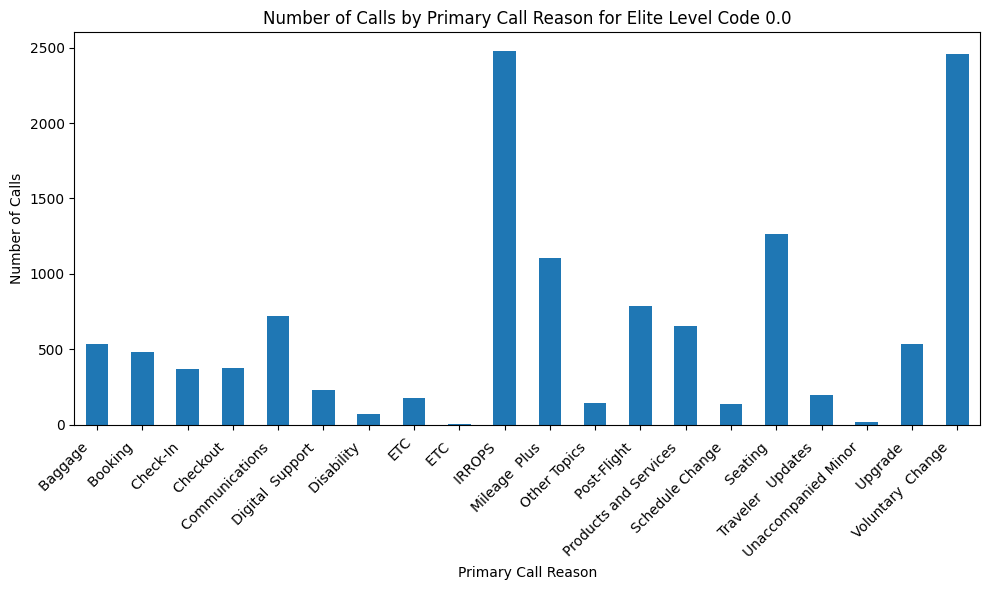

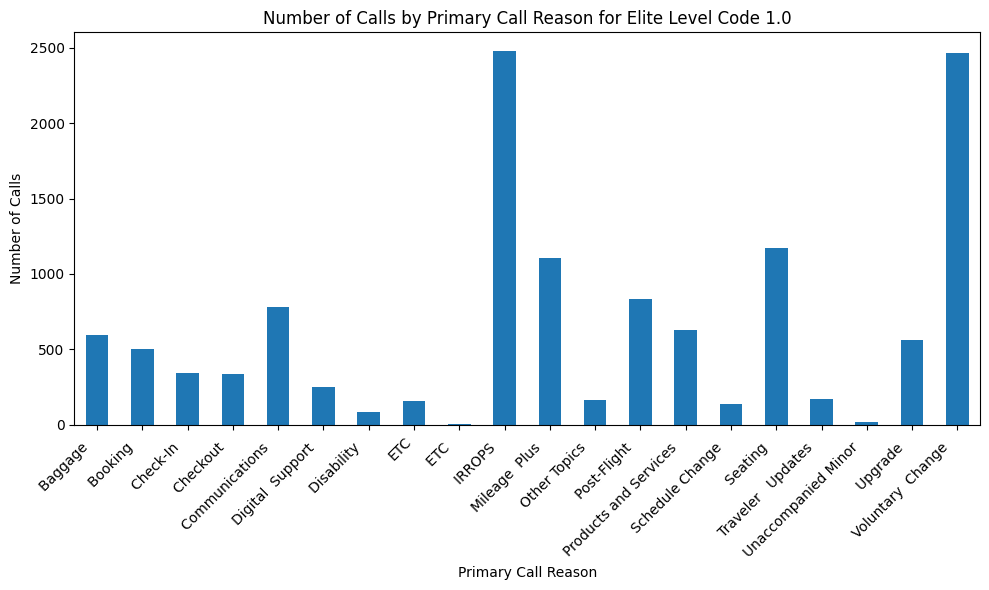

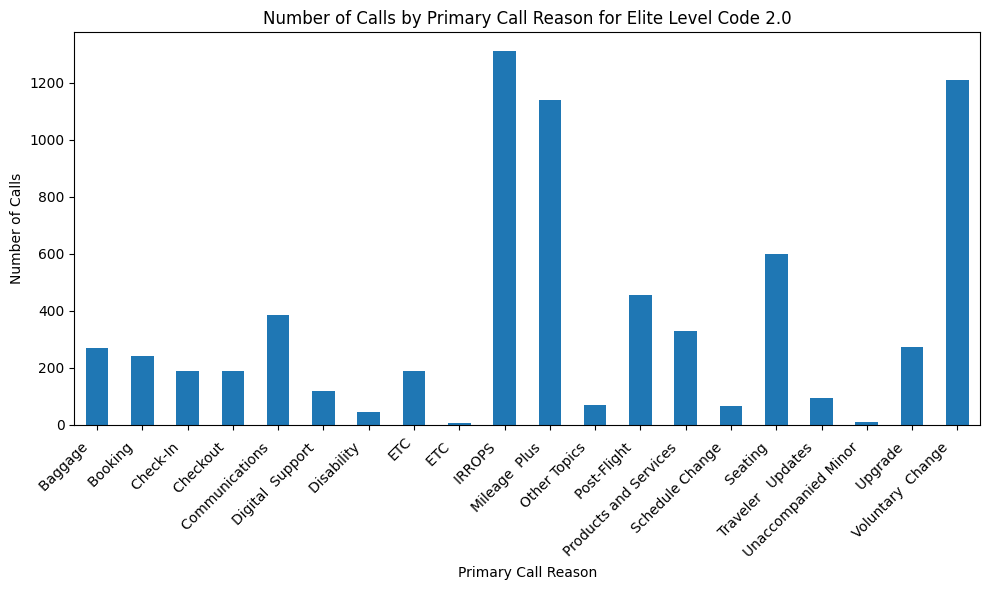

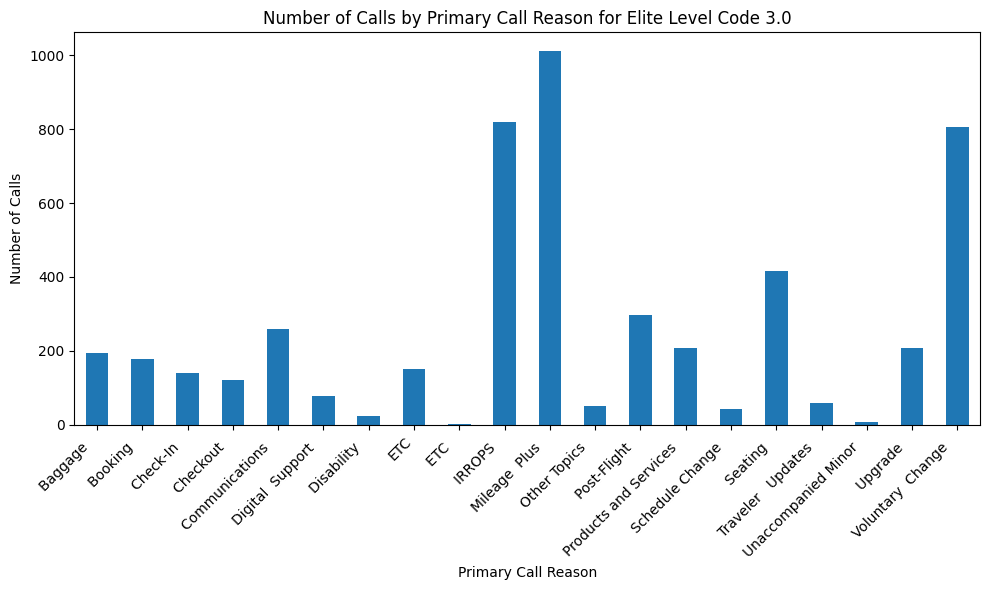

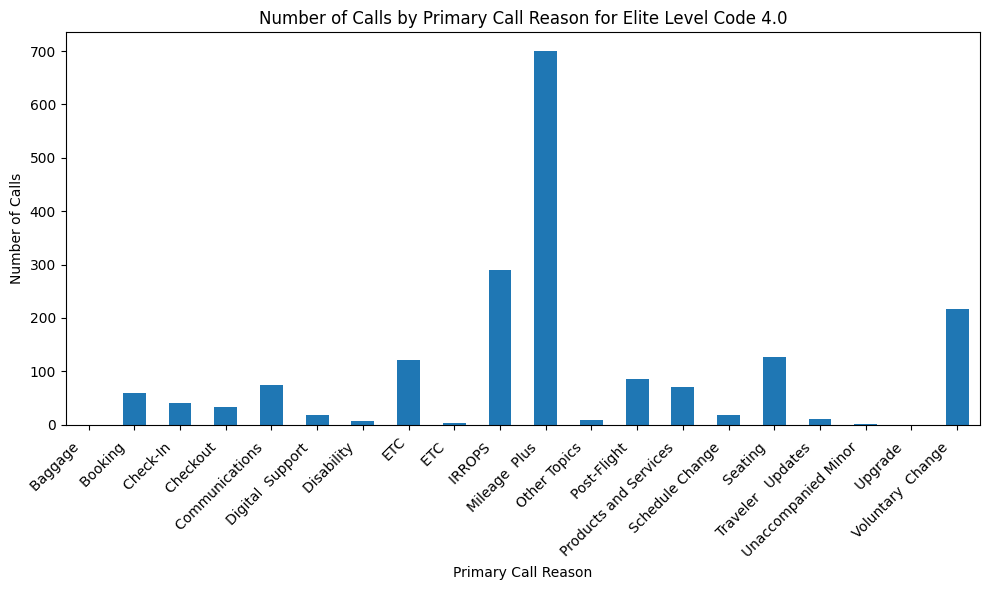

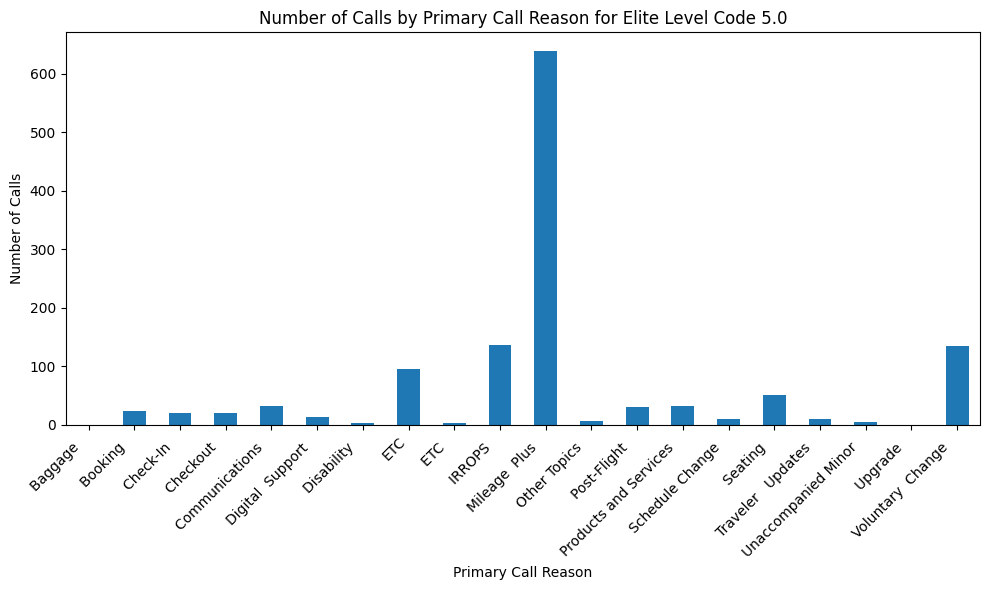

In [ ]:
grouped_data = final_total_merge_dataset.groupby(['elite_level_code', 'primary_call_reason'])['call_id'].count().unstack()

for elite_level in grouped_data.index:
  plt.figure(figsize=(10, 6))
  ax = grouped_data.loc[elite_level].plot(kind='bar')
  plt.xlabel('Primary Call Reason')
  plt.ylabel('Number of Calls')
  plt.title(f'Number of Calls by Primary Call Reason for Elite Level Code {elite_level}')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()


In [ ]:
final_total_merge_dataset.describe().T

count          mean           std        min  \
call_id                  40941.0  4.998624e+09  2.887685e+09  131642.00   
agent_id_x               40941.0  5.646064e+05  2.568712e+05  102574.00   
average_sentiment        40941.0 -2.917857e-02  1.166541e-01      -0.35   
silence_percent_average  40941.0  2.832542e-01  1.866499e-01       0.00   
customer_id              40941.0  5.000314e+09  2.883409e+09  752705.00   
waiting_minutes          40941.0  7.228255e+00  2.488812e+00       3.00   
resolve_minutes          40941.0  1.200205e+01  1.315357e+01       0.00   
elite_level_code         40941.0  1.373464e+00  1.323473e+00       0.00   
ast                      40941.0  4.336953e+02  1.493287e+02     180.00   
aht                      40941.0  7.201231e+02  7.892141e+02       0.00   

                                  25%           50%           75%  \
call_id                  2.483621e+09  4.995964e+09  7.496830e+09   
agent_id_x               3.489980e+05  5.917780e+05  7.846480e+05   
average_sentiment       -1.000000e-01 -2.000000e-02  4.000000e-02   
silence_percent_average  1.300000e-01  2.600000e-01  4.100000e-01   
customer_id              2.511385e+09  4.995931e+09  7.500898e+09   
waiting_minutes          5.000000e+00  7.000000e+00  9.000000e+00   
resolve_minutes          4.000000e+00  8.000000e+00  1.500000e+01   
elite_level_code         0.000000e+00  1.000000e+00  2.000000e+00   
ast                      3.000000e+02  4.200000e+02  5.400000e+02   
aht                      2.400000e+02  4.800000e+02  9.000000e+02   

                                  max  
call_id                  9.999669e+09  
agent_id_x               9.938620e+05  
average_sentiment        2.900000e-01  
silence_percent_average  8.200000e-01  
customer_id              9.999901e+09  
waiting_minutes          1.500000e+01  
resolve_minutes          1.190000e+02  
elite_level_code         5.000000e+00  
ast                      9.000000e+02  
aht                      7.140000e+03

In [ ]:
pd.crosstab(final_total_merge_dataset['primary_call_reason'], final_total_merge_dataset['elite_level_code'])


elite_level_code          0.0   1.0   2.0   3.0  4.0  5.0
primary_call_reason                                      
Baggage                   534   597   268   193    0    0
Booking                   483   500   242   177   60   23
Check-In                  368   344   189   141   41   20
Checkout                  376   338   190   120   33   20
Communications            719   778   384   258   75   32
Digital  Support          231   252   118    78   18   13
Disability                 71    81    43    23    7    3
ETC                       180   159   187   151  121   95
ETC                         6     3     5     1    4    3
IRROPS                   2478  2479  1311   820  290  137
Mileage  Plus            1103  1107  1140  1012  700  639
Other Topics              145   167    70    50    9    7
Post-Flight               789   833   454   297   85   31
Products and Services     657   629   330   207   71   32
Schedule Change           136   137    65    43   19    9
Seating                  1265  1170   598   415  127   50
Traveler   Updates        199   173    94    59   10   10
Unaccompanied Minor        17    19     9     8    2    5
Upgrade                   535   561   273   208    0    0
Voluntary  Change        2455  2467  1210   806  217  135

In [ ]:
pd.crosstab(final_total_merge_dataset['primary_call_reason'], final_total_merge_dataset['agent_tone'])


agent_tone               calm  frustrated  neutral
primary_call_reason                               
Baggage                   560          43      989
Booking                   529          38      918
Check-In                  348          52      703
Checkout                  269          59      749
Communications            776          82     1388
Digital  Support          225          24      461
Disability                110           1      117
ETC                       272          42      579
ETC                         5           0       17
IRROPS                   1938         434     5143
Mileage  Plus            2075         165     3461
Other Topics              151          13      284
Post-Flight               723         136     1630
Products and Services     664          78     1184
Schedule Change           130          18      261
Seating                  1512          63     2050
Traveler   Updates        229           8      308
Unaccompanied Minor        20           3       37
Upgrade                   609          46      922
Voluntary  Change        2950         186     4154

In [ ]:
pd.crosstab(final_total_merge_dataset['primary_call_reason'], final_total_merge_dataset['customer_tone'])

customer_tone            angry  calm  frustrated  neutral  polite
primary_call_reason                                              
Baggage                    324   302         324      323     319
Booking                    281   311         285      327     281
Check-In                   206   238         241      198     220
Checkout                   206   226         203      232     210
Communications             429   456         438      458     465
Digital  Support           139   150         138      141     142
Disability                  48    49          45       46      40
ETC                        194   173         175      176     175
ETC                          6     3           6        3       4
IRROPS                    1526  1471        1483     1498    1537
Mileage  Plus             1085  1121        1162     1192    1141
Other Topics                74    97          93       87      97
Post-Flight                505   525         476      484     499
Products and Services      377   391         425      369     364
Schedule Change             76    65          84       81     103
Seating                    719   691         718      771     726
Traveler   Updates         118   111         102      110     104
Unaccompanied Minor         17     4          13       14      12
Upgrade                    332   321         287      310     327
Voluntary  Change         1451  1468        1404     1462    1505

In [ ]:
pd.crosstab(final_total_merge_dataset['agent_tone'], final_total_merge_dataset['customer_tone'])

customer_tone  angry  calm  frustrated  neutral  polite
agent_tone                                             
calm            2738  2829        2806     2888    2834
frustrated       300   266         298      312     315
neutral         5075  5078        4998     5082    5122

In [ ]:
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_transcript(transcript):
    sentences = nltk.sent_tokenize(transcript)
    if len(sentences) > 2:  # Ensure there are enough sentences
        relevant_sentences = sentences[1:-1]
    else:
        relevant_sentences = []
    cleaned_transcript = ' '.join(relevant_sentences)

    lemmatizer = WordNetLemmatizer()
    text = re.sub(r'[^\w\s]', '', cleaned_transcript)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    extended_stop_words = stop_words.union({'agent', 'customer', 'im', 'let', 'would', 'like', 'look', 'thank', 'get','day','help','need'})
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in extended_stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
final_total_merge_dataset['cleaned_transcript'] = final_total_merge_dataset['call_transcript'].apply(preprocess_transcript)

group_dataset = final_total_merge_dataset.groupby('primary_call_reason')['cleaned_transcript'].apply(lambda x: ' '.join(x)).reset_index()

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(final_total_merge_dataset['cleaned_transcript'])

feature_names = vectorizer.get_feature_names_out()
word_frequencies = tfidf_matrix.sum(axis=0).A1

word_freq_df = pd.DataFrame({'word': feature_names, 'frequency': word_frequencies})
top_words_by_reason = {}
for index, row in group_dataset.iterrows():
    tfidf_matrix_reason = vectorizer.transform([row['cleaned_transcript']])
    word_frequencies_reason = tfidf_matrix_reason.sum(axis=0).A1
    top_words_by_reason[row['primary_call_reason']] = pd.DataFrame({'word': feature_names, 'frequency': word_frequencies_reason}).sort_values(by='frequency', ascending=False).head(10)

for reason, df in top_words_by_reason.items():
    print(f"Top words for {reason}:")
    print(df)

Top words for Baggage  :
         word  frequency
17091  flight   0.430846
13506  change   0.231017
16852     fee   0.128524
32923    work   0.114766
14803    date   0.108289
15004   delay   0.106977
30603  typing   0.100315
30054    time   0.097884
23386    next   0.095419
23851    okay   0.092795
Top words for Booking  :
         word  frequency
17091  flight   0.431201
13506  change   0.234848
16852     fee   0.130622
32923    work   0.117597
14803    date   0.104706
15004   delay   0.102054
23386    next   0.100527
30603  typing   0.098907
30054    time   0.094997
30414  travel   0.094587
Top words for Check-In  :
         word  frequency
17091  flight   0.429262
13506  change   0.216757
16852     fee   0.124165
15004   delay   0.122033
32923    work   0.112000
30054    time   0.102616
23386    next   0.099691
14803    date   0.098667
30603  typing   0.097661
34094    yeah   0.091961
Top words for Checkout  :
         word  frequency
17091  flight   0.419234
13506  change   0.22099

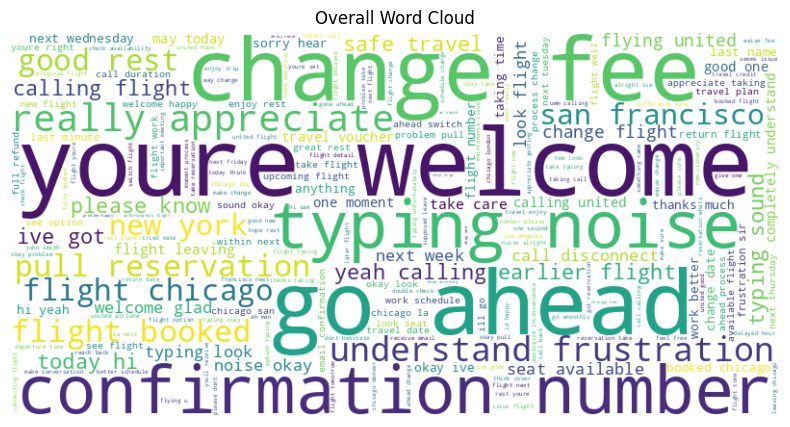

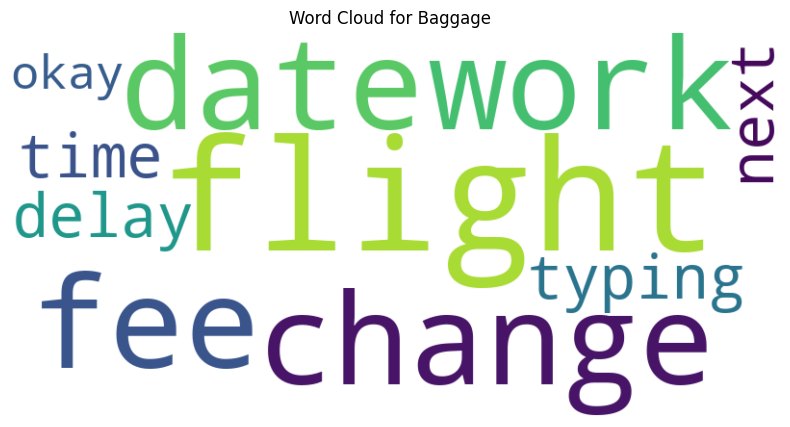

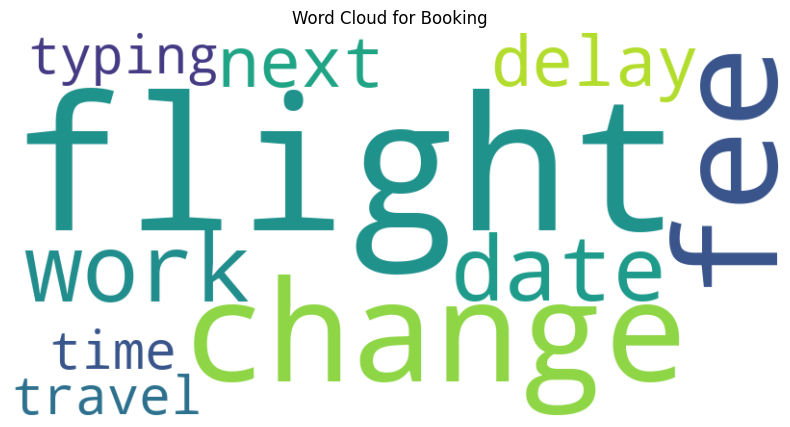

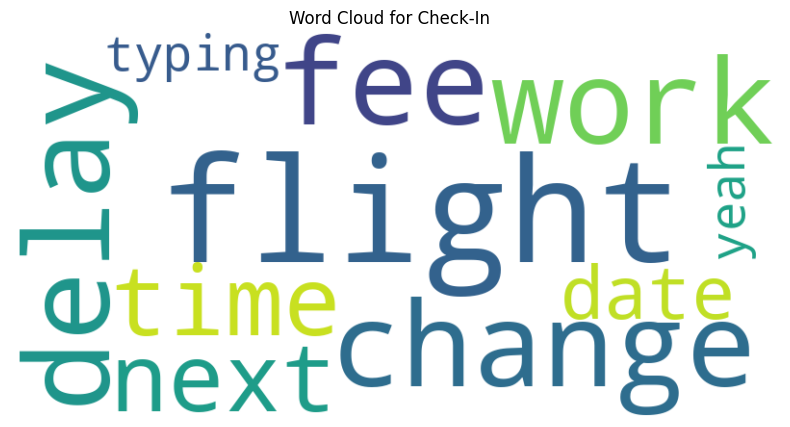

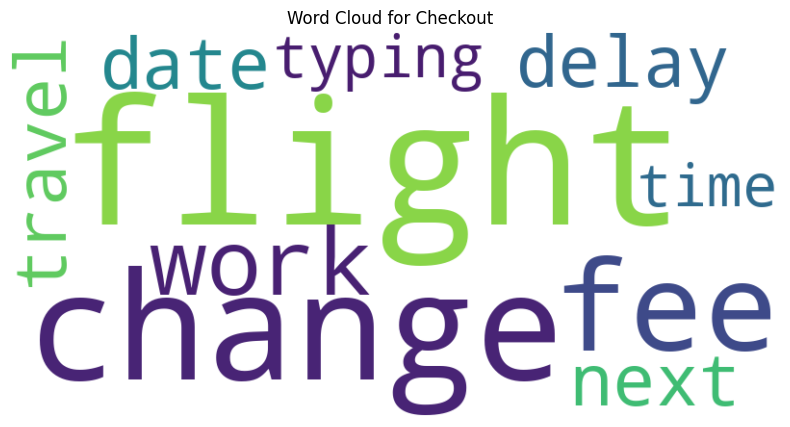

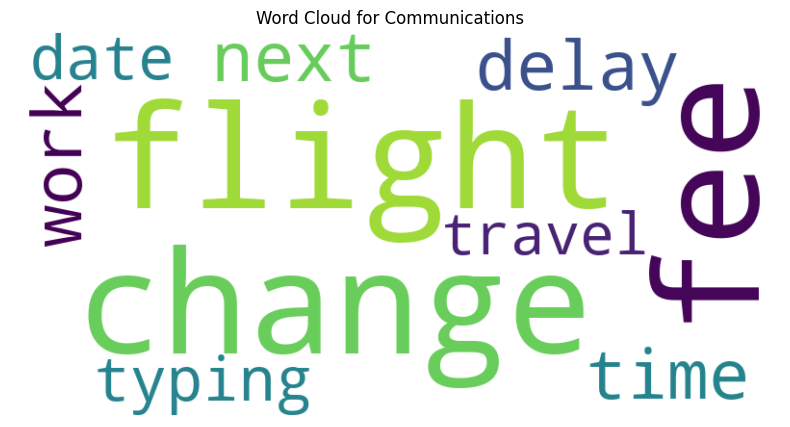

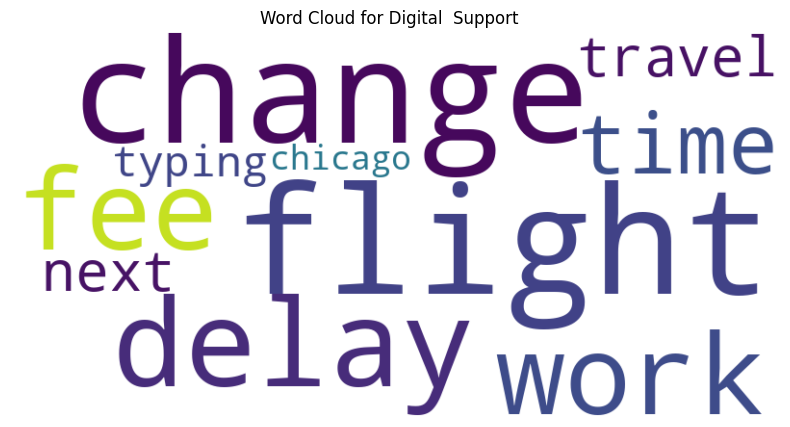

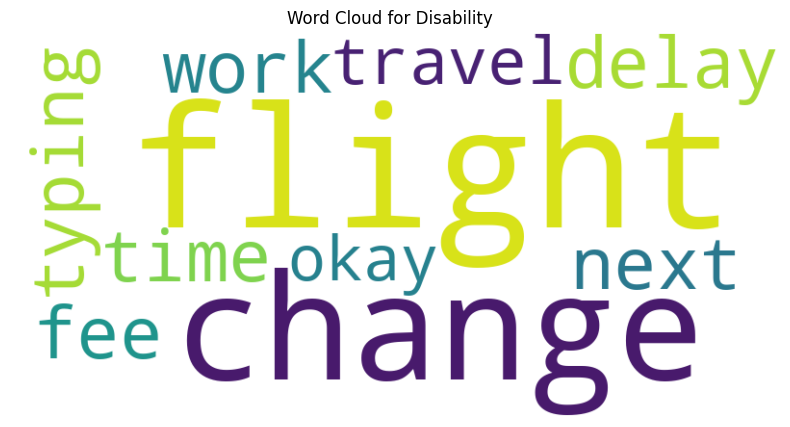

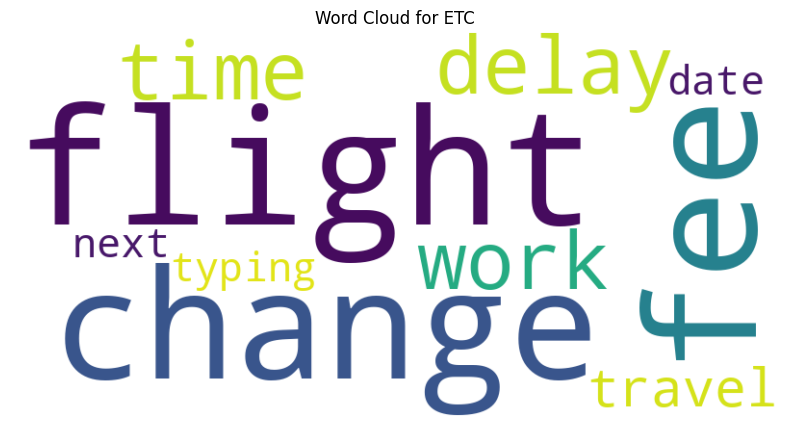

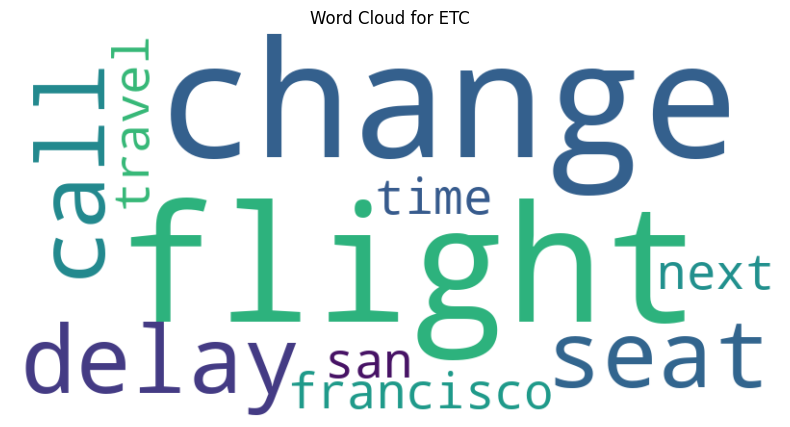

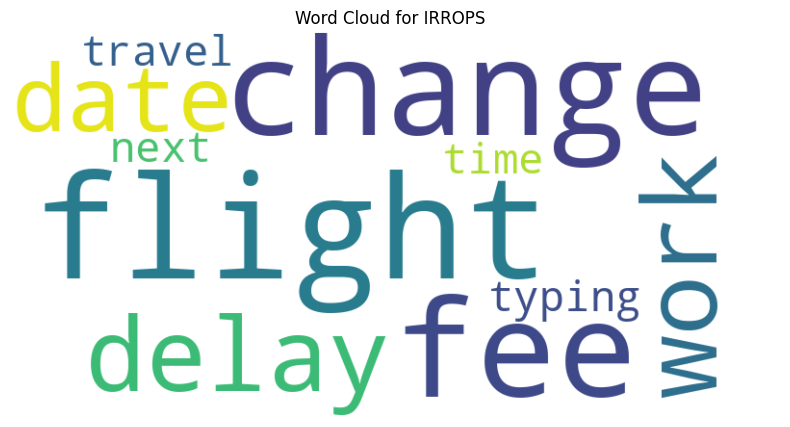

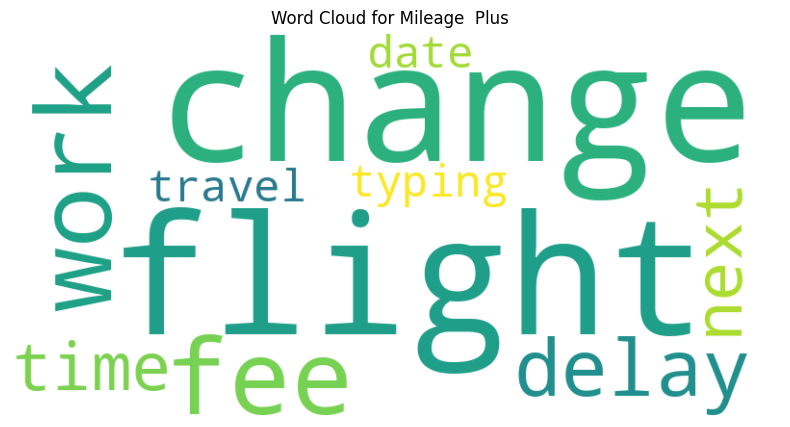

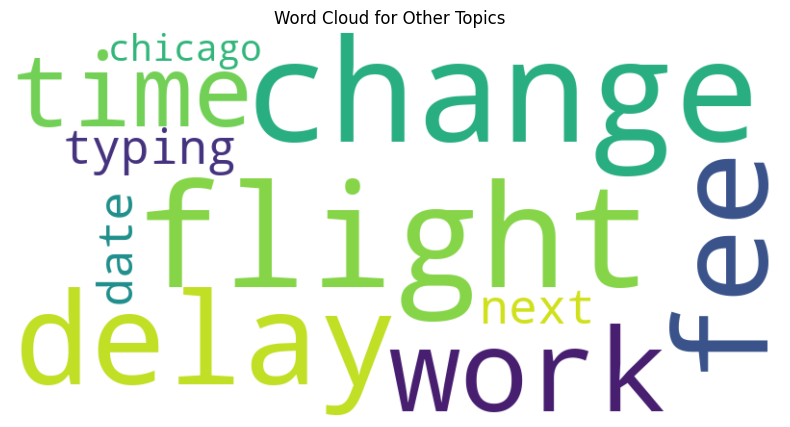

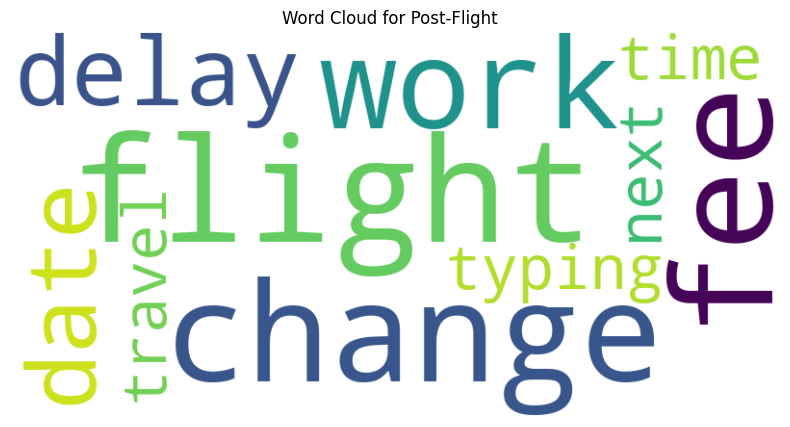

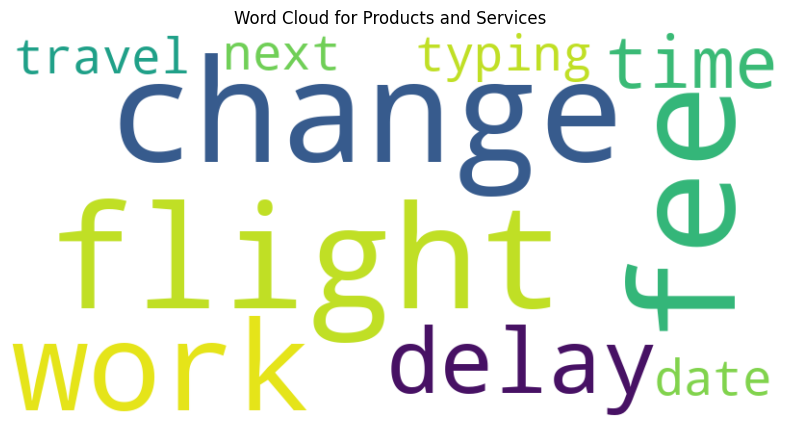

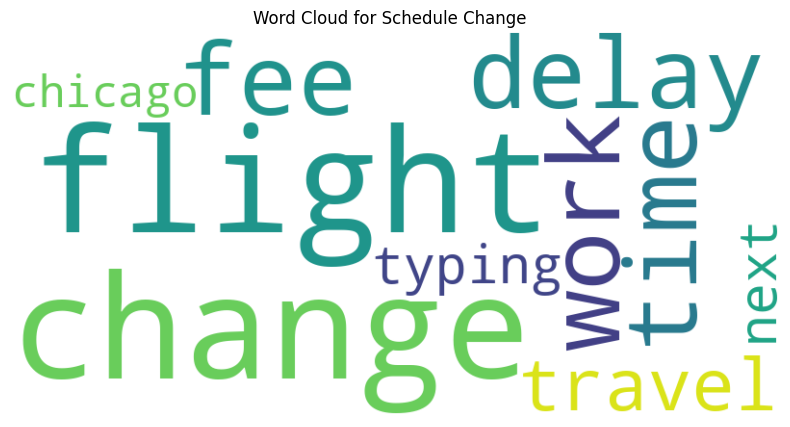

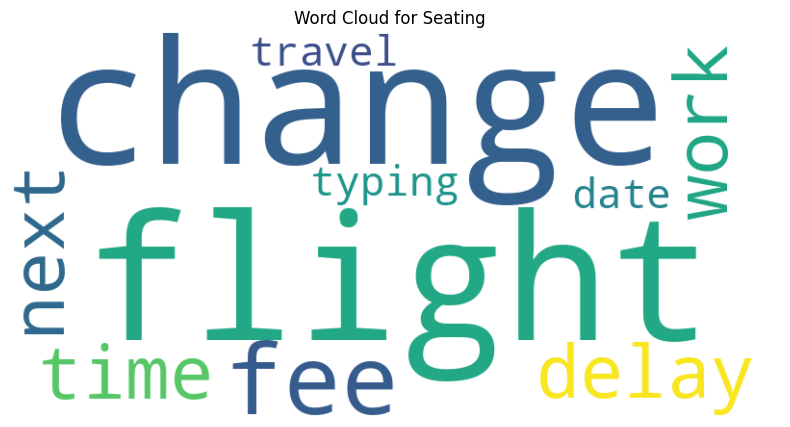

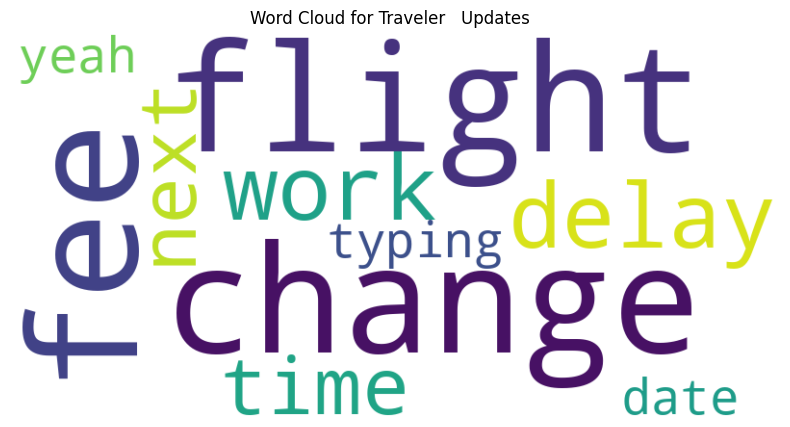

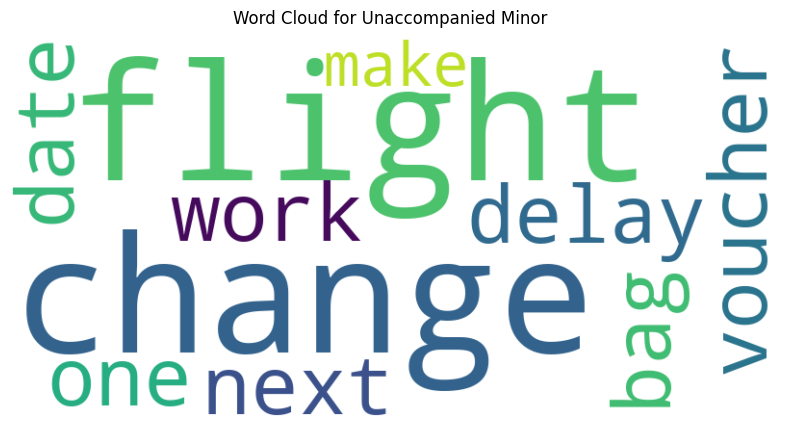

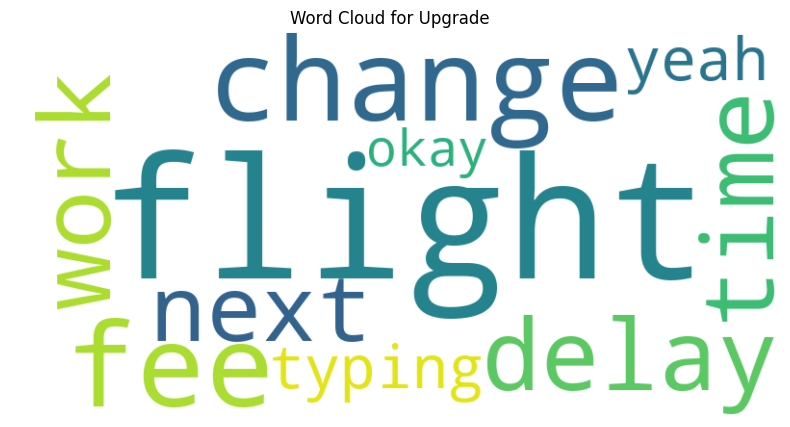

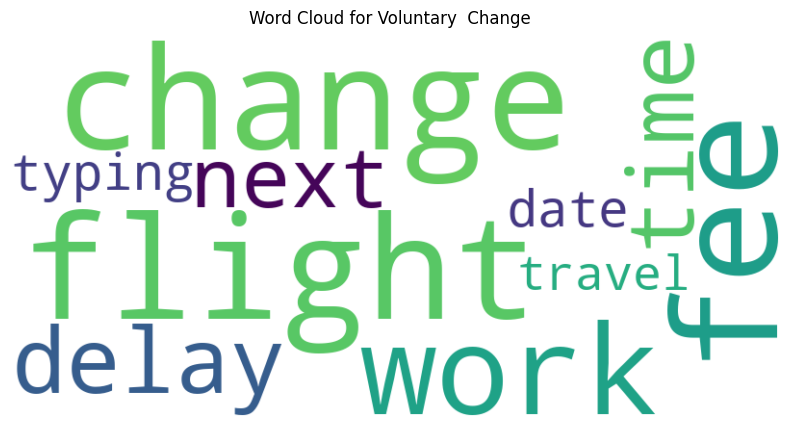

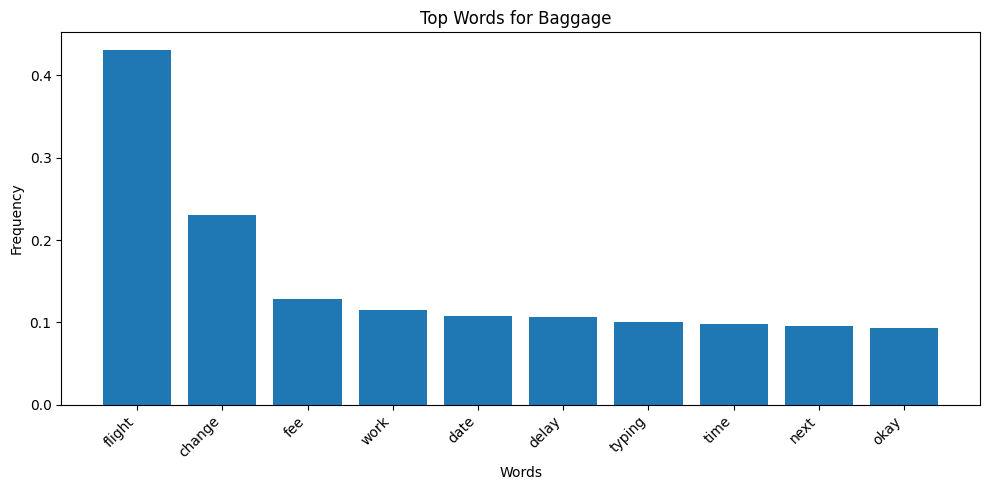

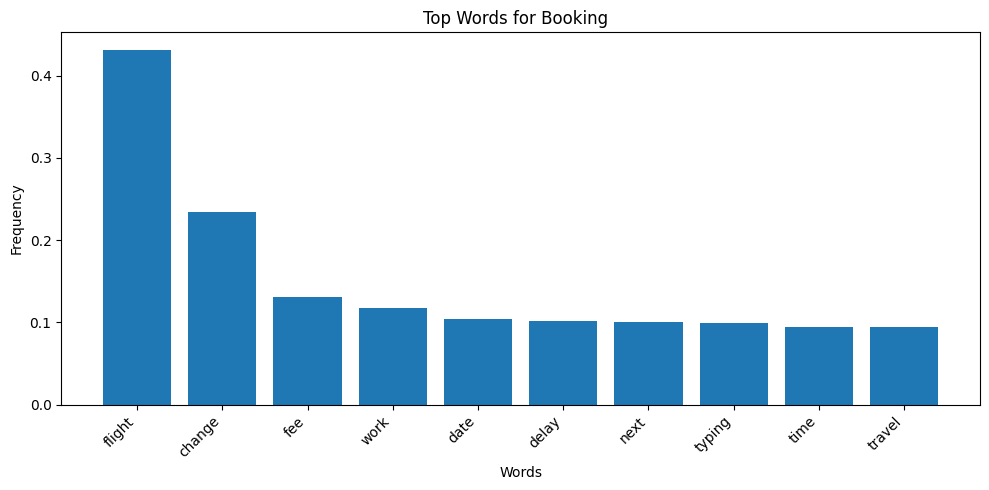

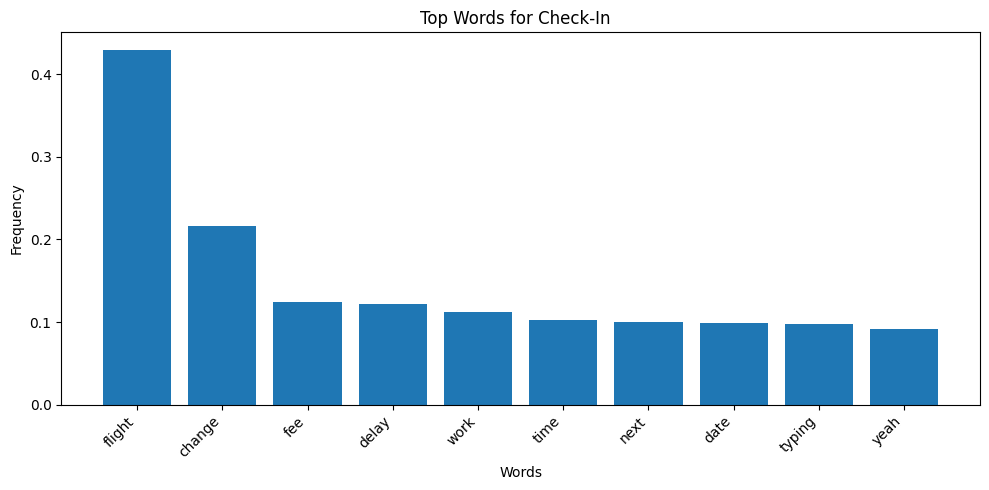

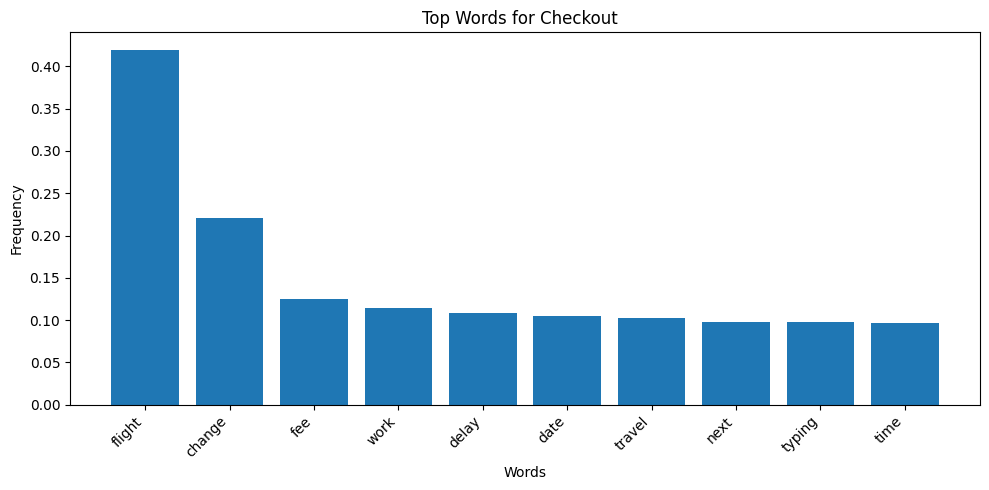

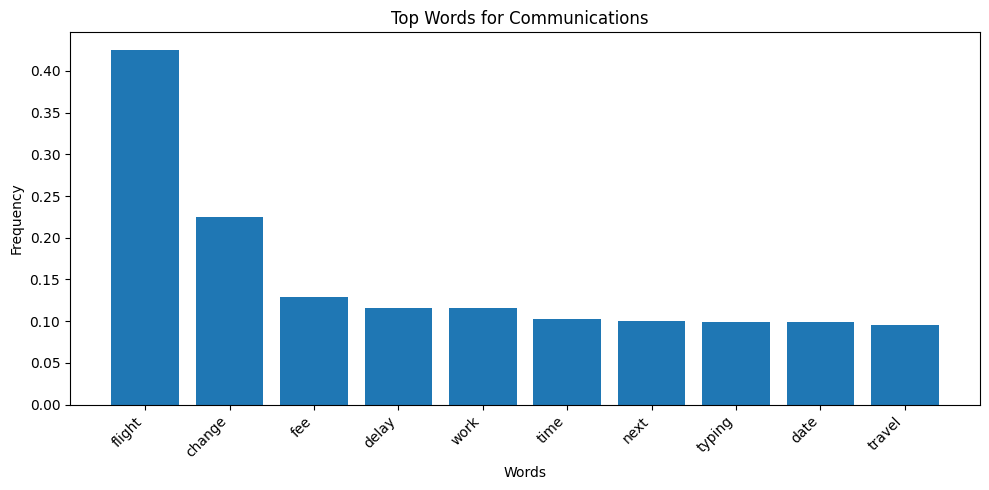

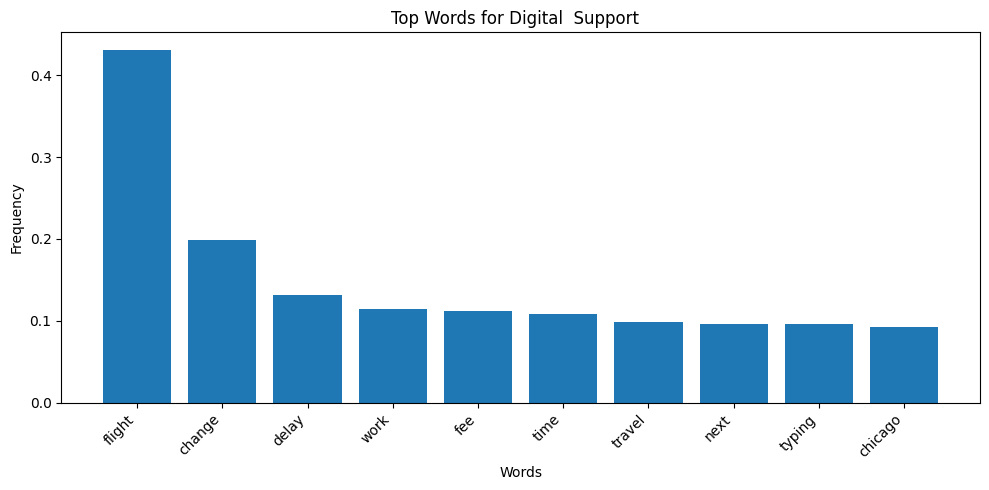

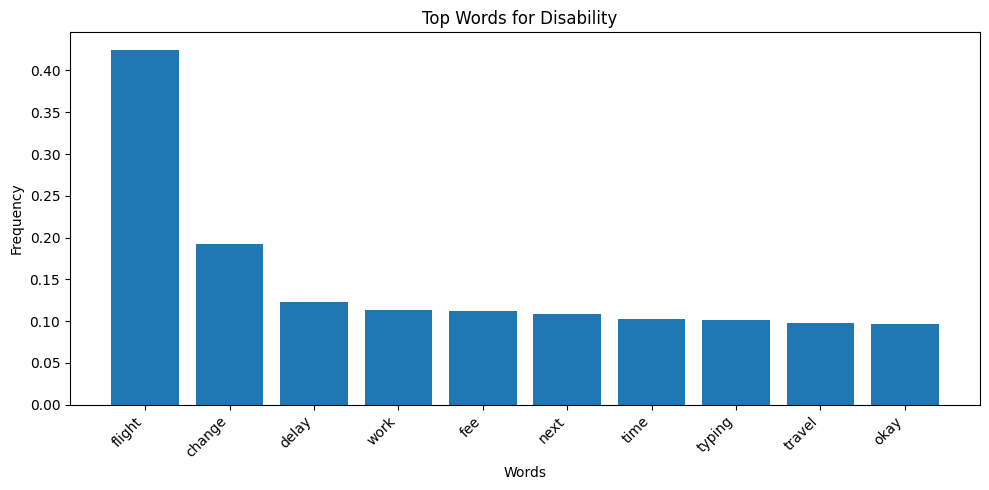

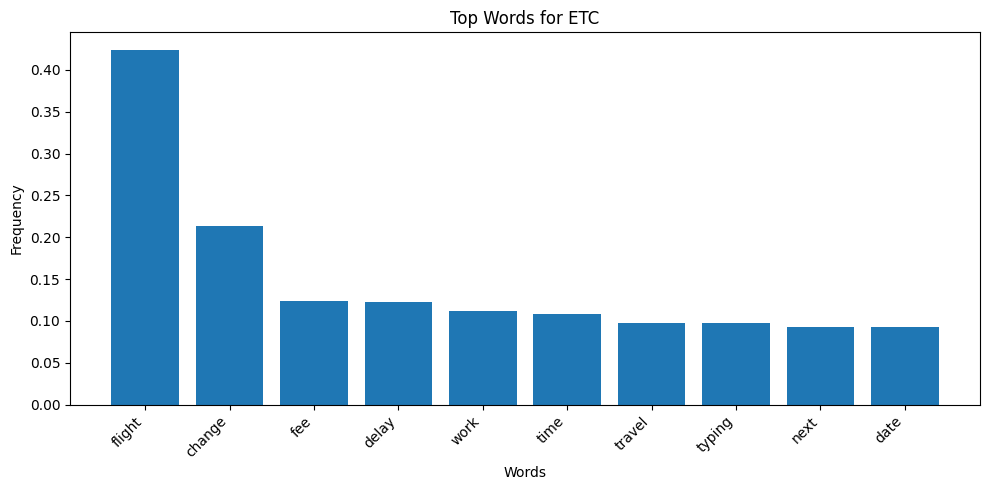

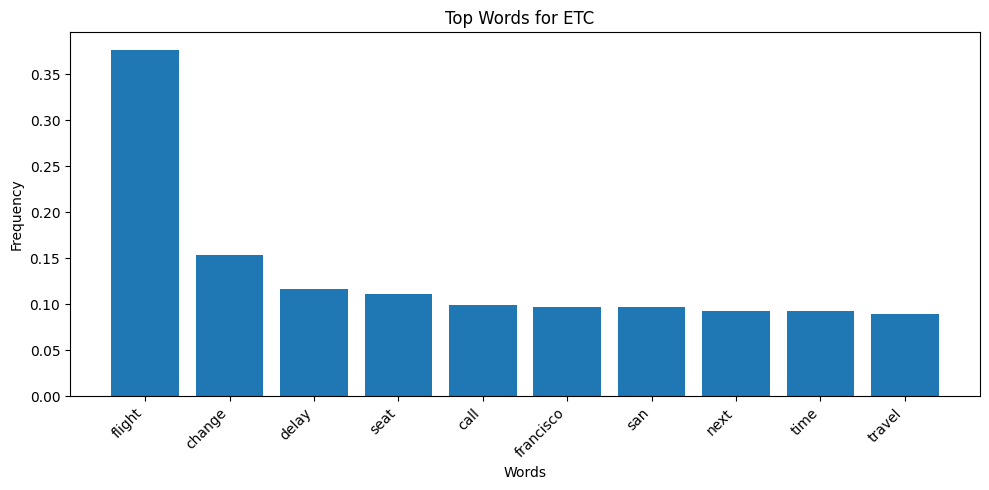

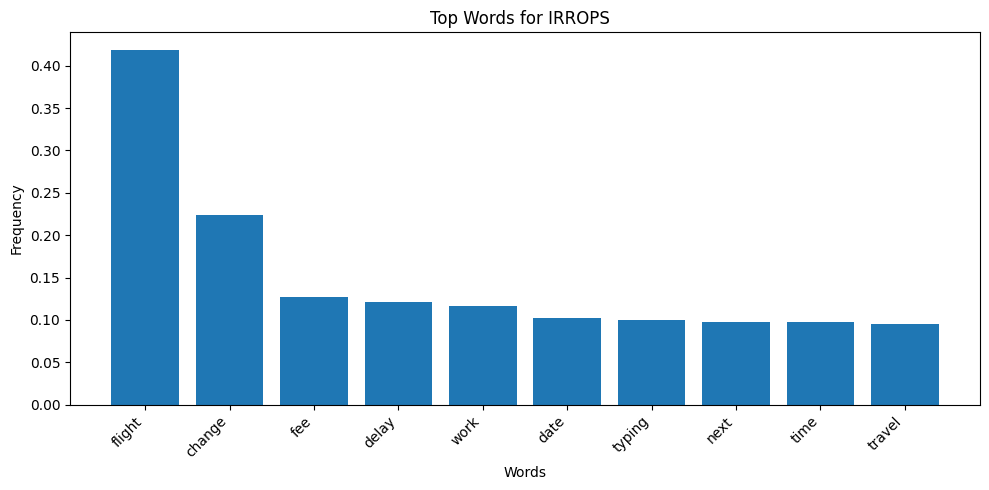

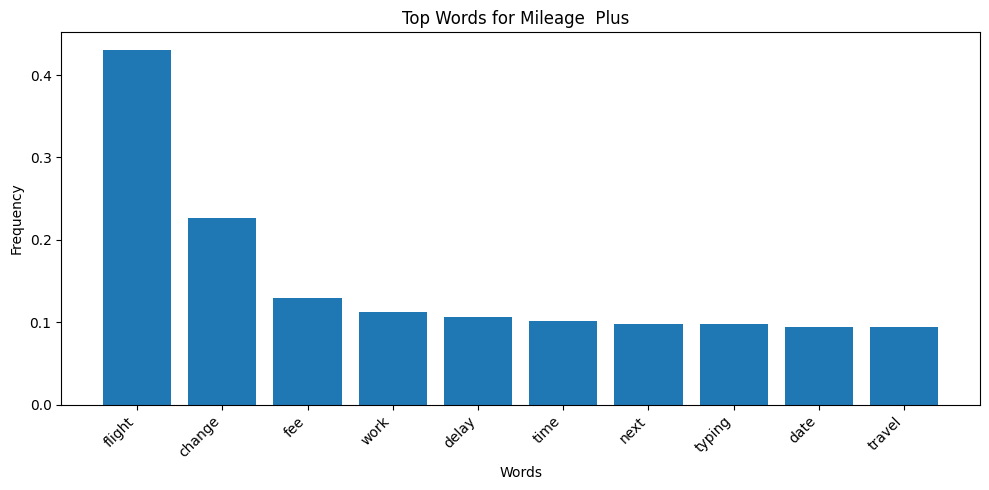

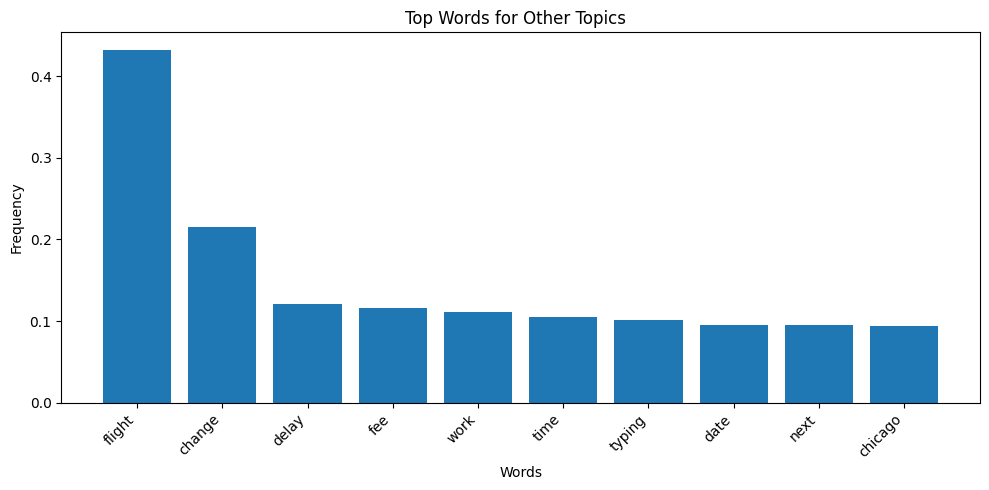

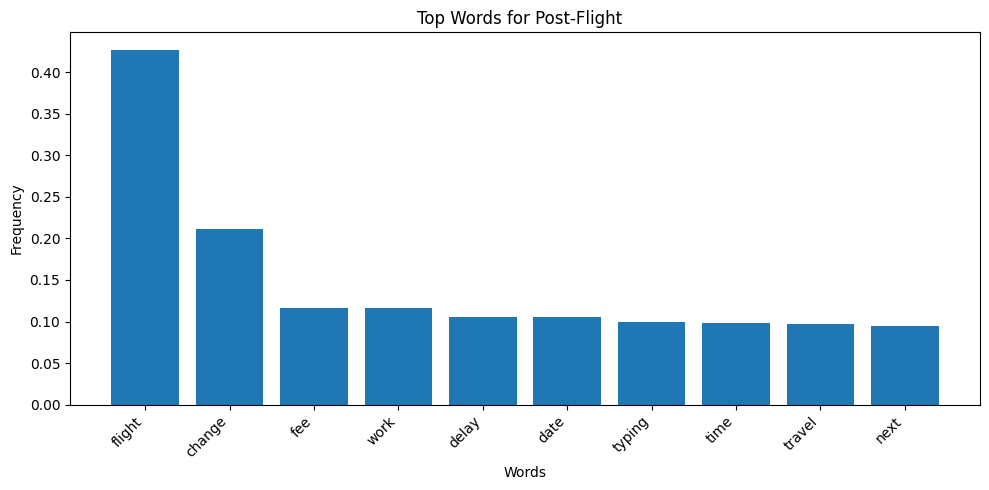

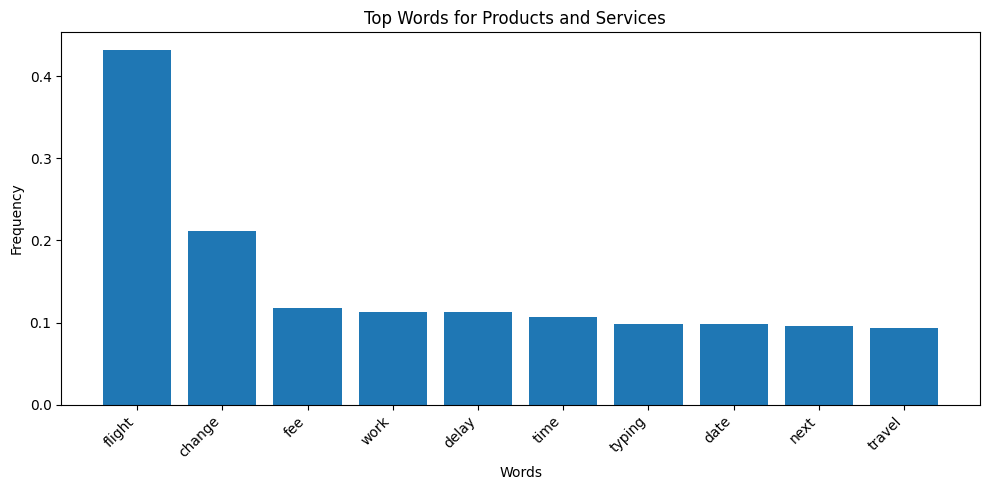

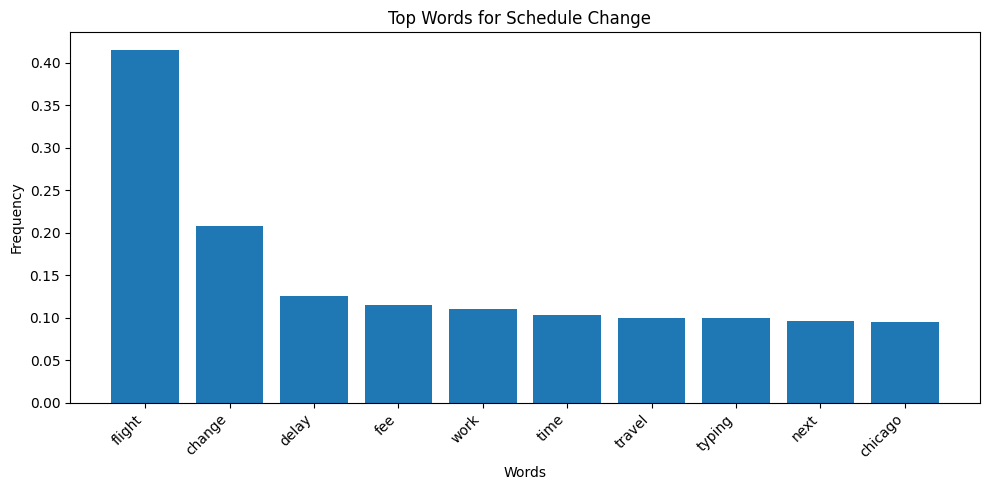

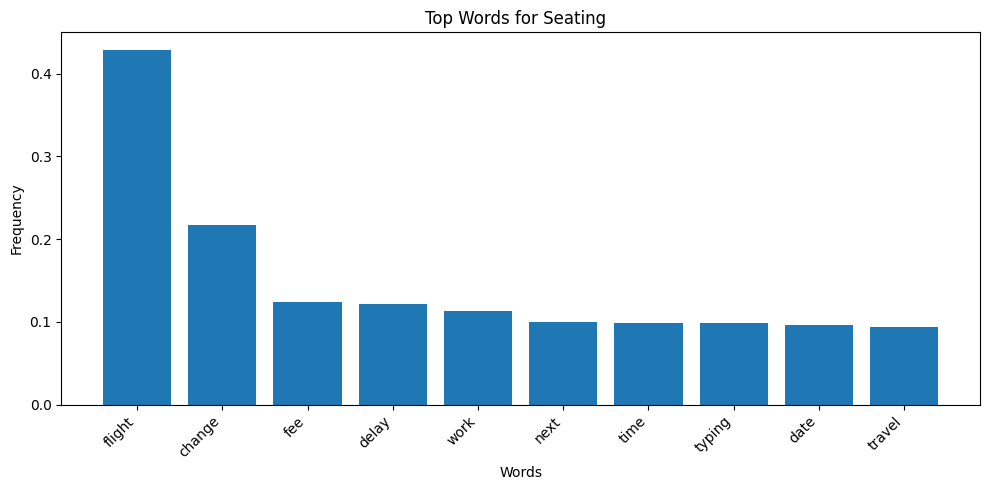

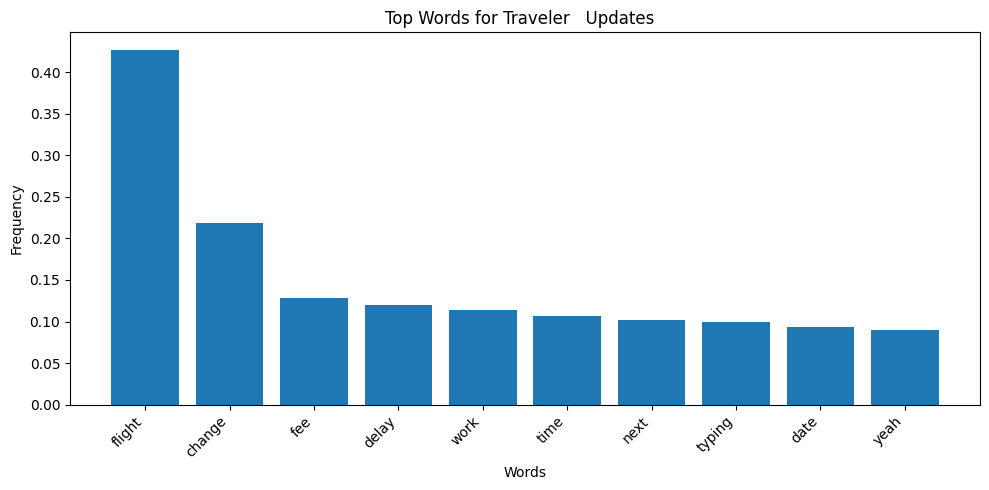

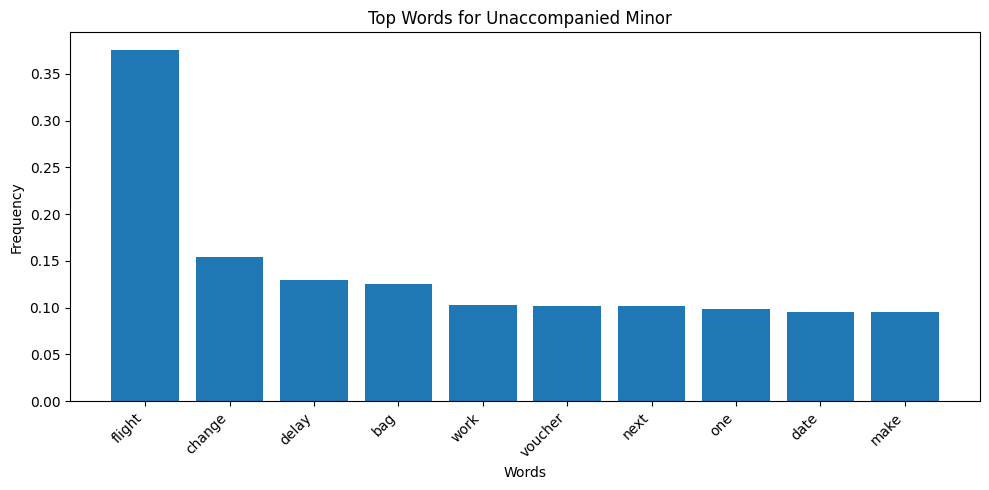

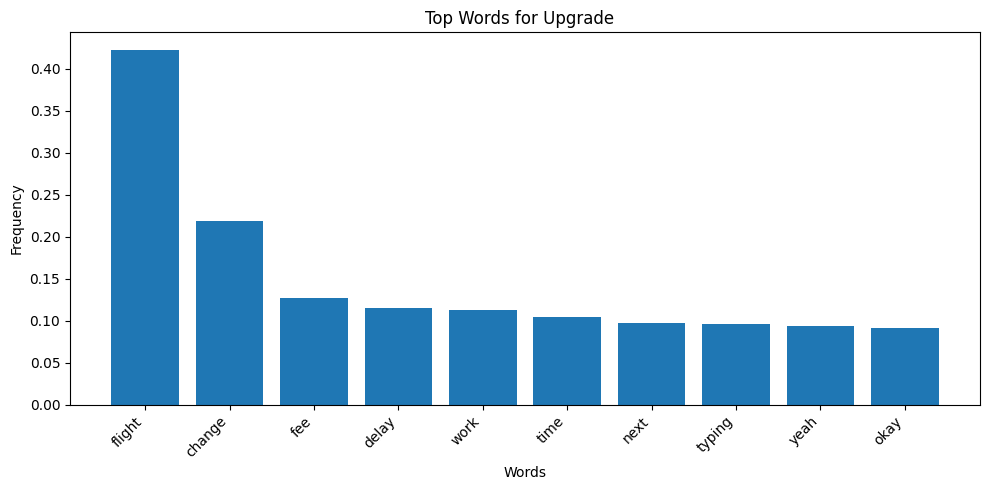

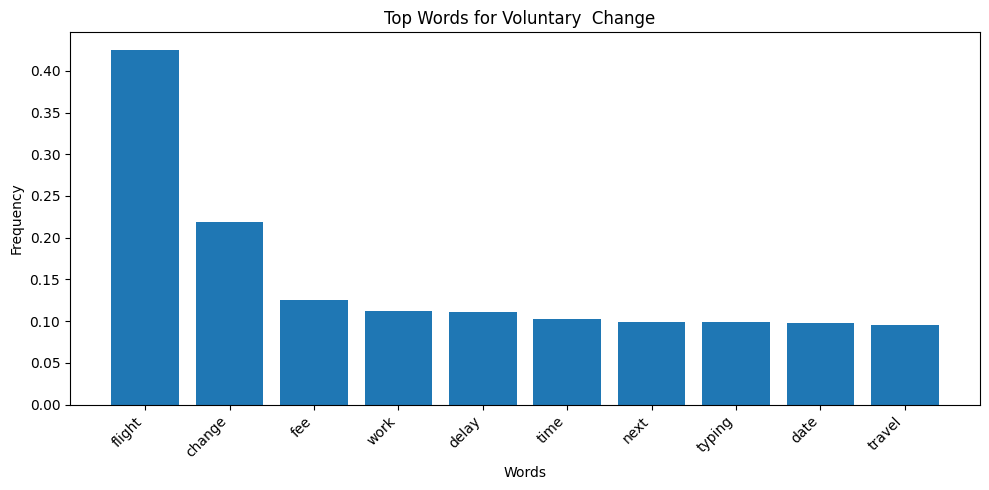

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(final_total_merge_dataset['cleaned_transcript'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Word Cloud')
plt.show()
for reason, df in top_words_by_reason.items():
    text_reason = ' '.join(df['word'])
    wordcloud_reason = WordCloud(width=800, height=400, background_color='white').generate(text_reason)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_reason, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {reason}')
    plt.show()

for reason, df in top_words_by_reason.items():
    plt.figure(figsize=(10, 5))
    plt.bar(df['word'], df['frequency'])
    plt.title(f'Top Words for {reason}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
